In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
from google.colab import files
uploaded = files.upload()

# List the uploaded files
print(uploaded.keys())

# Read the CSV file
df = pd.read_csv('2_spotify_10_songs.csv')


dict_keys([])


In [ ]:
df.columns

Index(['song_name                                                               ',
       'artist               ', 'danceability ', 'energy  ', 'key ',
       'loudness ', 'mode ', 'speechiness ', 'acousticness ',
       'instrumentalness ', 'liveness ', 'valence ', 'tempo   ',
       'duration_ms ', 'time_signature ', 'id                     ', 'html'],
      dtype='object')

In [ ]:
df.set_index('song_name                                                               ', inplace=True)

In [ ]:
df

artist                 \
song_name                                      ...                          
My Band                                        ...  D12                     
The Real Slim Shady                            ...  Eminem                  
Águas De Março                                 ...  Antônio Carlos Jobim    
The Girl From Ipanema                          ...  Stan Getz               
Paint It, Black                                ...  The Rolling Stones      
Sultans Of Swing                               ...  Dire Straits            
Space Raiders - Charlotte de Witte Remix       ...  Eats Everything         
In Silence                                     ...  Amelie Lens             
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...  Johannes Brahms         
Nocturne en mi bémol majeur opus 9 n°2: Ballade...  Frédéric Chopin         

                                                    danceability   energy    \
song_name                                      ...                            
My Band                                        ...          0.851   0.84900   
The Real Slim Shady                            ...          0.949   0.66100   
Águas De Março                                 ...          0.642   0.33900   
The Girl From Ipanema                          ...          0.641   0.14000   
Paint It, Black                                ...          0.464   0.79500   
Sultans Of Swing                               ...          0.733   0.79400   
Space Raiders - Charlotte de Witte Remix       ...          0.749   0.73100   
In Silence                                     ...          0.736   0.84500   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...          0.184   0.00833   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...          0.387   0.04510   

                                                    key   loudness   mode   \
song_name                                      ...                           
My Band                                        ...     1     -3.383      0   
The Real Slim Shady                            ...     5     -4.244      0   
Águas De Março                                 ...     3    -15.503      1   
The Girl From Ipanema                          ...     8    -16.790      1   
Paint It, Black                                ...     1     -9.267      1   
Sultans Of Swing                               ...     5    -10.023      1   
Space Raiders - Charlotte de Witte Remix       ...     4    -10.865      1   
In Silence                                     ...     1    -12.017      1   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...     3    -33.503      1   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...     3    -24.698      1   

                                                    speechiness   \
song_name                                      ...                 
My Band                                        ...        0.0828   
The Real Slim Shady                            ...        0.0572   
Águas De Março                                 ...        0.1400   
The Girl From Ipanema                          ...        0.0390   
Paint It, Black                                ...        0.0926   
Sultans Of Swing                               ...        0.0307   
Space Raiders - Charlotte de Witte Remix       ...        0.1080   
In Silence                                     ...        0.0377   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...        0.0519   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...        0.0364   

                                                    acousticness   \
song_name                                      ...                  
My Band                                        ...        0.49700   
The Real Slim Shady                            ...        0.03020   
Águas De Março                                 ...        0.85400   
The Girl From Ipanema                          ...        0.86700   
Paint It, 

In [ ]:
df.drop(columns=['id                     ', 'html', 'artist               '], inplace=True)

In [ ]:
df

danceability   energy    \
song_name                                      ...                            
My Band                                        ...          0.851   0.84900   
The Real Slim Shady                            ...          0.949   0.66100   
Águas De Março                                 ...          0.642   0.33900   
The Girl From Ipanema                          ...          0.641   0.14000   
Paint It, Black                                ...          0.464   0.79500   
Sultans Of Swing                               ...          0.733   0.79400   
Space Raiders - Charlotte de Witte Remix       ...          0.749   0.73100   
In Silence                                     ...          0.736   0.84500   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...          0.184   0.00833   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...          0.387   0.04510   

                                                    key   loudness   mode   \
song_name                                      ...                           
My Band                                        ...     1     -3.383      0   
The Real Slim Shady                            ...     5     -4.244      0   
Águas De Março                                 ...     3    -15.503      1   
The Girl From Ipanema                          ...     8    -16.790      1   
Paint It, Black                                ...     1     -9.267      1   
Sultans Of Swing                               ...     5    -10.023      1   
Space Raiders - Charlotte de Witte Remix       ...     4    -10.865      1   
In Silence                                     ...     1    -12.017      1   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...     3    -33.503      1   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...     3    -24.698      1   

                                                    speechiness   \
song_name                                      ...                 
My Band                                        ...        0.0828   
The Real Slim Shady                            ...        0.0572   
Águas De Março                                 ...        0.1400   
The Girl From Ipanema                          ...        0.0390   
Paint It, Black                                ...        0.0926   
Sultans Of Swing                               ...        0.0307   
Space Raiders - Charlotte de Witte Remix       ...        0.1080   
In Silence                                     ...        0.0377   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...        0.0519   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...        0.0364   

                                                    acousticness   \
song_name                                      ...                  
My Band                                        ...        0.49700   
The Real Slim Shady                            ...        0.03020   
Águas De Março                                 ...        0.85400   
The Girl From Ipanema                          ...        0.86700   
Paint It, Black                                ...        0.04930   
Sultans Of Swing                               ...        0.06140   
Space Raiders - Charlotte de Witte Remix       ...        0.00314   
In Silence                                     ...        0.00548   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...        0.98900   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...        0.99000   

                                                    instrumentalness   \
song_name                                      ...                      
My Band                                        ...           0.000002   
The Real Slim Shady                            ...           0.000000   
Águas De Março                                 ...           0.000000   
The Girl From Ipanema                          ...           0.001660   
Paint It, Black                                ...           0.002440   
Sultans O

### Two dimensional clustering

In [ ]:
average_scores = df.mean()

In [ ]:
average_scores

danceability              0.633600
energy                    0.520743
key                       3.400000
loudness                -14.029300
mode                      0.800000
speechiness               0.067630
acousticness              0.434652
instrumentalness          0.331780
liveness                  0.153840
valence                   0.456580
tempo                   118.716000
duration_ms          287493.800000
time_signature            3.900000
dtype: float64

In [ ]:
two_dim_df = df.loc[:, ['energy  ', 'danceability ']].copy()

In [ ]:
two_dim_df

energy    danceability 
song_name                                      ...                         
My Band                                        ...   0.84900          0.851
The Real Slim Shady                            ...   0.66100          0.949
Águas De Março                                 ...   0.33900          0.642
The Girl From Ipanema                          ...   0.14000          0.641
Paint It, Black                                ...   0.79500          0.464
Sultans Of Swing                               ...   0.79400          0.733
Space Raiders - Charlotte de Witte Remix       ...   0.73100          0.749
In Silence                                     ...   0.84500          0.736
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...   0.00833          0.184
Nocturne en mi bémol majeur opus 9 n°2: Ballade...   0.04510          0.387

In [ ]:
# Now we will .fit() the k-means model to our data.
music_obj = KMeans(n_clusters=3, random_state=24)

In [ ]:
music_obj.fit(two_dim_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=24)

In [ ]:
music_obj.cluster_centers_

array([[0.2395    , 0.6415    ],
       [0.77916667, 0.747     ],
       [0.026715  , 0.2855    ]])

In [ ]:
music_obj.labels_

array([1, 1, 0, 0, 1, 1, 1, 1, 2, 2], dtype=int32)

In [ ]:
table = music_obj.labels_
two_dim_df['table'] = table
two_dim_df.sort_values(by="table")

energy    danceability   \
song_name                                      ...                            
Águas De Março                                 ...   0.33900          0.642   
The Girl From Ipanema                          ...   0.14000          0.641   
My Band                                        ...   0.84900          0.851   
The Real Slim Shady                            ...   0.66100          0.949   
Paint It, Black                                ...   0.79500          0.464   
Sultans Of Swing                               ...   0.79400          0.733   
Space Raiders - Charlotte de Witte Remix       ...   0.73100          0.749   
In Silence                                     ...   0.84500          0.736   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...   0.00833          0.184   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...   0.04510          0.387   

                                                    table  
song_name                                      ...         
Águas De Março                                 ...      0  
The Girl From Ipanema                          ...      0  
My Band                                        ...      1  
The Real Slim Shady                            ...      1  
Paint It, Black                                ...      1  
Sultans Of Swing                               ...      1  
Space Raiders - Charlotte de Witte Remix       ...      1  
In Silence                                     ...      1  
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...      2  
Nocturne en mi bémol majeur opus 9 n°2: Ballade...      2

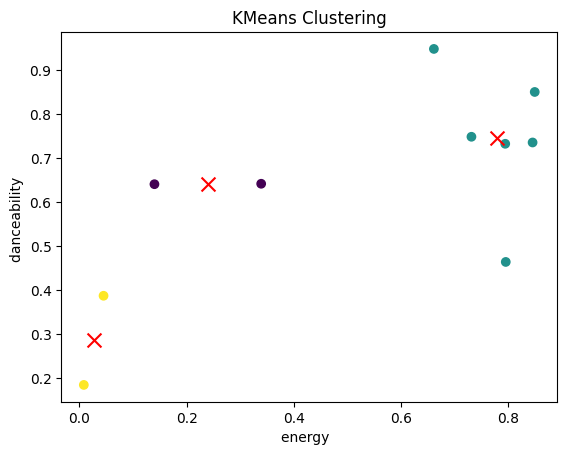

In [ ]:
# @title Clusters and centroids

# Plot the data points
plt.scatter(x = two_dim_df.loc[:, 'energy  '],
            y = two_dim_df.loc[:, 'danceability '],
            c = music_obj.labels_,
            cmap = 'viridis')

# Plot the cluster centers
plt.scatter(x = music_obj.cluster_centers_[:, 0],
            y = music_obj.cluster_centers_[:, 1],
            c = 'red',
            marker = 'x',
            s = 100)

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_dim_df.columns[0])
plt.ylabel(two_dim_df.columns[1])

# Display the plot
plt.show()

### Clustering in multiple dimension

In [ ]:
full_music_obj = KMeans(n_clusters=3, random_state=10)

In [ ]:
full_music_obj = KMeans(n_clusters=3, random_state=10)
full_music_obj.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [ ]:
full_music_obj.cluster_centers_

array([[ 7.12200000e-01,  4.97820000e-01,  4.40000000e+00,
        -1.18276000e+01,  6.00000000e-01,  4.92200000e-02,
         4.89120000e-01,  1.90272410e-01,  1.41680000e-01,
         5.98800000e-01,  1.12700800e+02,  3.03602200e+05,
         4.00000000e+00, -1.11022302e-16],
       [ 4.30000000e-01,  3.80776667e-01,  2.33333333e+00,
        -1.94243333e+01,  1.00000000e+00,  9.48333333e-02,
         6.30766667e-01,  1.99480000e-01,  2.02666667e-01,
         4.38000000e-01,  1.21216667e+02,  1.74822333e+05,
         3.66666667e+00,  1.00000000e+00],
       [ 7.42500000e-01,  7.88000000e-01,  2.50000000e+00,
        -1.14410000e+01,  1.00000000e+00,  7.28500000e-02,
         4.31000000e-03,  8.84000000e-01,  1.11000000e-01,
         1.28900000e-01,  1.30003000e+02,  4.16230000e+05,
         4.00000000e+00,  2.00000000e+00]])

In [ ]:
full_music_obj.labels_

array([0, 0, 1, 0, 1, 0, 2, 2, 1, 0], dtype=int32)

In [ ]:
table = full_music_obj.labels_
df['table'] = table
df.sort_values(by='table')

danceability   energy    \
song_name                                      ...                            
My Band                                        ...          0.851   0.84900   
The Real Slim Shady                            ...          0.949   0.66100   
The Girl From Ipanema                          ...          0.641   0.14000   
Sultans Of Swing                               ...          0.733   0.79400   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...          0.387   0.04510   
Águas De Março                                 ...          0.642   0.33900   
Paint It, Black                                ...          0.464   0.79500   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...          0.184   0.00833   
Space Raiders - Charlotte de Witte Remix       ...          0.749   0.73100   
In Silence                                     ...          0.736   0.84500   

                                                    key   loudness   mode   \
song_name                                      ...                           
My Band                                        ...     1     -3.383      0   
The Real Slim Shady                            ...     5     -4.244      0   
The Girl From Ipanema                          ...     8    -16.790      1   
Sultans Of Swing                               ...     5    -10.023      1   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...     3    -24.698      1   
Águas De Março                                 ...     3    -15.503      1   
Paint It, Black                                ...     1     -9.267      1   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...     3    -33.503      1   
Space Raiders - Charlotte de Witte Remix       ...     4    -10.865      1   
In Silence                                     ...     1    -12.017      1   

                                                    speechiness   \
song_name                                      ...                 
My Band                                        ...        0.0828   
The Real Slim Shady                            ...        0.0572   
The Girl From Ipanema                          ...        0.0390   
Sultans Of Swing                               ...        0.0307   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...        0.0364   
Águas De Março                                 ...        0.1400   
Paint It, Black                                ...        0.0926   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...        0.0519   
Space Raiders - Charlotte de Witte Remix       ...        0.1080   
In Silence                                     ...        0.0377   

                                                    acousticness   \
song_name                                      ...                  
My Band                                        ...        0.49700   
The Real Slim Shady                            ...        0.03020   
The Girl From Ipanema                          ...        0.86700   
Sultans Of Swing                               ...        0.06140   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...        0.99000   
Águas De Março                                 ...        0.85400   
Paint It, Black                                ...        0.04930   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...        0.98900   
Space Raiders - Charlotte de Witte Remix       ...        0.00314   
In Silence                                     ...        0.00548   

                                                    instrumentalness   \
song_name                                      ...                      
My Band                                        ...           0.000002   
The Real Slim Shady                            ...           0.000000   
The Girl From Ipanema                          ...           0.001660   
Sultans Of Swing                               ...           0.036700   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...           0.913000   
Águas De 

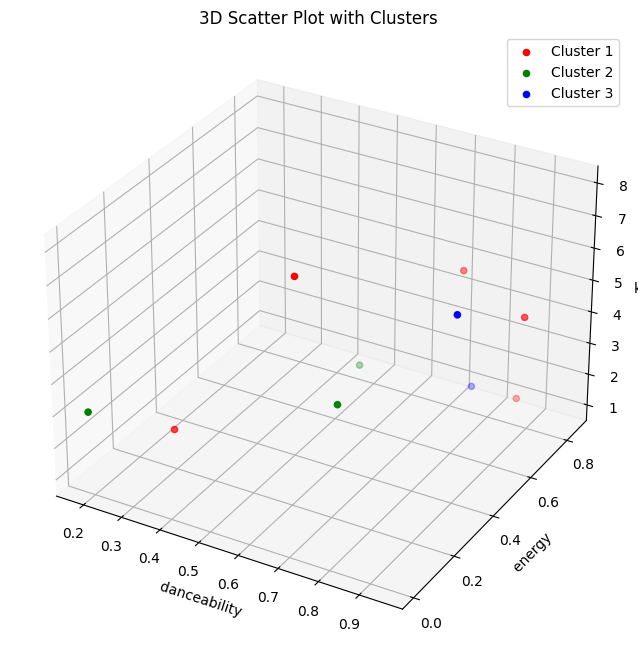

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for clusters
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster = df[df['table'] == i]
    ax.scatter(cluster.iloc[:, 0], cluster.iloc[:, 1], cluster.iloc[:, 2], c=colors[i], label=f'Cluster {i + 1}')

ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.set_zlabel(df.columns[2])
ax.set_title('3D Scatter Plot with Clusters')
ax.legend()

plt.show()


### Scaling the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn import set_config
set_config(transform_output = "pandas")

In [4]:
from sklearn import set_config
set_config(transform_output = "pandas")

In [7]:
from google.colab import files
uploaded = files.upload()

# List the uploaded files
print(uploaded.keys())

# Read the CSV file
df = pd.read_csv('2_spotify_10_songs.csv')

Saving 2_spotify_10_songs.csv to 2_spotify_10_songs (1).csv
dict_keys(['2_spotify_10_songs (1).csv'])


In [5]:
df.columns

Index(['song_name                                                               ',
       'artist               ', 'danceability ', 'energy  ', 'key ',
       'loudness ', 'mode ', 'speechiness ', 'acousticness ',
       'instrumentalness ', 'liveness ', 'valence ', 'tempo   ',
       'duration_ms ', 'time_signature ', 'id                     ', 'html'],
      dtype='object')

In [6]:
df.drop(columns=['id                     ', 'html', 'artist               '], inplace=True)

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['song_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [9]:
df

song_name  danceability   energy  \
0  My Band                                       ...         0.851  0.84900   
1  The Real Slim Shady                           ...         0.949  0.66100   
2  Águas De Março                                ...         0.642  0.33900   
3  The Girl From Ipanema                         ...         0.641  0.14000   
4  Paint It, Black                               ...         0.464  0.79500   
5  Sultans Of Swing                              ...         0.733  0.79400   
6  Space Raiders - Charlotte de Witte Remix      ...         0.749  0.73100   
7  In Silence                                    ...         0.736  0.84500   
8  Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...         0.184  0.00833   
9  Nocturne en mi bémol majeur opus 9 n°2: Ballad...         0.387  0.04510   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    1    -3.383     0       0.0828       0.49700          0.000002    0.1160   
1    5    -4.244     0       0.0572       0.03020          0.000000    0.0454   
2    3   -15.503     1       0.1400       0.85400          0.000000    0.1050   
3    8   -16.790     1       0.0390       0.86700          0.001660    0.1050   
4    1    -9.267     1       0.0926       0.04930          0.002440    0.3990   
5    5   -10.023     1       0.0307       0.06140          0.036700    0.3300   
6    4   -10.865     1       0.1080       0.00314          0.867000    0.1110   
7    1   -12.017     1       0.0377       0.00548          0.901000    0.1110   
8    3   -33.503     1       0.0519       0.98900          0.596000    0.1040   
9    3   -24.698     1       0.0364       0.99000          0.913000    0.1120   

   valence    tempo  duration_ms  time_signature  
0   0.8440  120.014       298773               4  
1   0.7600  104.504       284200               4  
2   0.4910  143.418       212400               4  
3   0.3880  129.318       317987               4  
4   0.6120  158.691       202267               4  
5   0.9310  148.174       348624               4  
6   0.0598  131.997       438720               4  
7   0.1980  128.009       393740               4  
8   0.2110   61.541       109800               3  
9   0.0710   61.494       268427               4

In [10]:
df.set_index('song_name', inplace=True)

In [11]:
df

danceability   energy  \
song_name                                                                   
My Band                                        ...         0.851  0.84900   
The Real Slim Shady                            ...         0.949  0.66100   
Águas De Março                                 ...         0.642  0.33900   
The Girl From Ipanema                          ...         0.641  0.14000   
Paint It, Black                                ...         0.464  0.79500   
Sultans Of Swing                               ...         0.733  0.79400   
Space Raiders - Charlotte de Witte Remix       ...         0.749  0.73100   
In Silence                                     ...         0.736  0.84500   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...         0.184  0.00833   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...         0.387  0.04510   

                                                    key  loudness  mode  \
song_name                                                                 
My Band                                        ...    1    -3.383     0   
The Real Slim Shady                            ...    5    -4.244     0   
Águas De Março                                 ...    3   -15.503     1   
The Girl From Ipanema                          ...    8   -16.790     1   
Paint It, Black                                ...    1    -9.267     1   
Sultans Of Swing                               ...    5   -10.023     1   
Space Raiders - Charlotte de Witte Remix       ...    4   -10.865     1   
In Silence                                     ...    1   -12.017     1   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...    3   -33.503     1   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...    3   -24.698     1   

                                                    speechiness  acousticness  \
song_name                                                                       
My Band                                        ...       0.0828       0.49700   
The Real Slim Shady                            ...       0.0572       0.03020   
Águas De Março                                 ...       0.1400       0.85400   
The Girl From Ipanema                          ...       0.0390       0.86700   
Paint It, Black                                ...       0.0926       0.04930   
Sultans Of Swing                               ...       0.0307       0.06140   
Space Raiders - Charlotte de Witte Remix       ...       0.1080       0.00314   
In Silence                                     ...       0.0377       0.00548   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...       0.0519       0.98900   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...       0.0364       0.99000   

                                                    instrumentalness  \
song_name                                                              
My Band                                        ...          0.000002   
The Real Slim Shady                            ...          0.000000   
Águas De Março                                 ...          0.000000   
The Girl From Ipanema                          ...          0.001660   
Paint It, Black                                ...          0.002440   
Sultans Of Swing                               ...          0.036700   
Space Raiders - Charlotte de Witte Remix       ...          0.867000   
In Silence                                     ...          0.901000   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...          0.596000   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...          0.913000   

                                                    liveness  valence  \
song_name                                                               
My Band                                        ...    0.1160   0.8440   
The Real Slim Shady                            ...    0.0454   0.7600   
Águas De Março                                 ...    0.1050   0.4910   
The Girl From Ipanema  

In [12]:
pairwise_dis_df = pd.DataFrame(pairwise_distances(df),
             index=df.index,
             columns=df.index
            )
pairwise_dis_df

song_name                                           My Band                                                                   \
song_name                                                                                                                      
My Band                                        ...                                           0.000000                          
The Real Slim Shady                            ...                                       14573.008837                          
Águas De Março                                 ...                                       86373.004053                          
The Girl From Ipanema                          ...                                       19214.008255                          
Paint It, Black                                ...                                       96506.007937                          
Sultans Of Swing                               ...                                       49851.008569                          
Space Raiders - Charlotte de Witte Remix       ...                                      139947.000755                          
In Silence                                     ...                                       94967.000742                          
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...                                      188973.011468                          
Nocturne en mi bémol majeur opus 9 n°2: Ballade...                                       30346.064036                          

song_name                                           The Real Slim Shady                                                       \
song_name                                                                                                                      
My Band                                        ...                                       14573.008837                          
The Real Slim Shady                            ...                                           0.000000                          
Águas De Março                                 ...                                       71800.011470                          
The Girl From Ipanema                          ...                                       33787.011607                          
Paint It, Black                                ...                                       81933.018179                          
Sultans Of Swing                               ...                                       64424.015069                          
Space Raiders - Charlotte de Witte Remix       ...                                      154520.002598                          
In Silence                                     ...                                      109540.002881                          
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...                                      174400.007771                          
Nocturne en mi bémol majeur opus 9 n°2: Ballade...                                       15773.072153                          

song_name                                           Águas De Março                                                            \
song_name                                                                                                                      
My Band                                        ...                                       86373.004053                          
The Real Slim Shady                            ...                                       71800.011470                          
Águas De Março                                 ...                                           0.000000                          
The Girl From Ipanema                          ...                                      105587.001068                          
Paint It, Black                                ...                                       10133.013675                          
Sultans Of Swing              

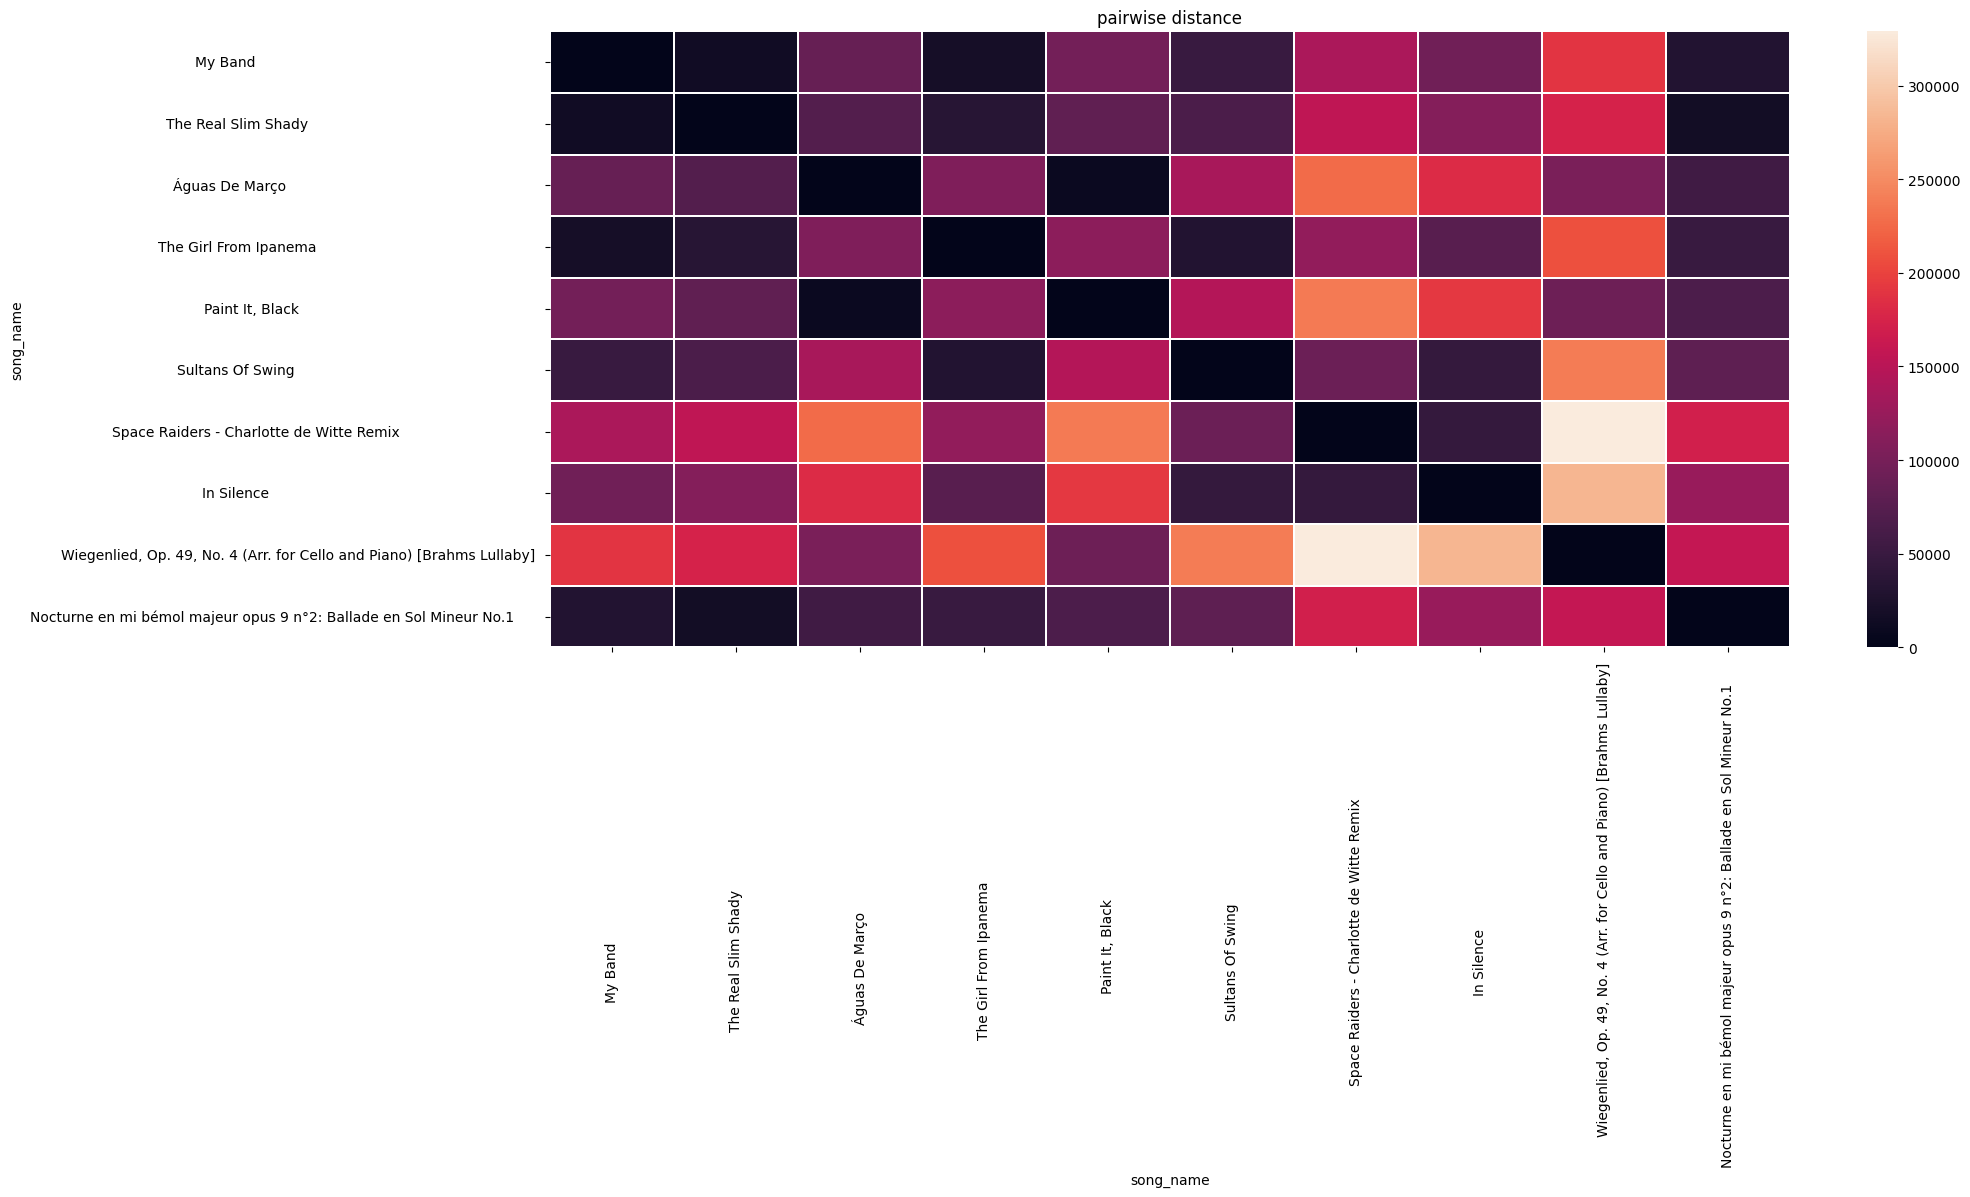

In [13]:
# Stating that we want two plots. we use pairedwise df to plot our heatmap
fig, ax = plt.subplots(1, figsize=(20, 8))

sns.heatmap(pairwise_dis_df, ax=ax, linewidths=.2);

ax.set_title('pairwise distance')
plt.show()

### Here we start scaling our data and at the end we will compare the results on KMeans algorithm
* MinMax scaler

In [14]:
# initialise scaler object
scaler_1 = MinMaxScaler()

In [15]:
scaler_1.fit(df)

MinMaxScaler()

In [16]:
scaler_1.data_max_

array([ 9.49000e-01,  8.49000e-01,  8.00000e+00, -3.38300e+00,
        1.00000e+00,  1.40000e-01,  9.90000e-01,  9.13000e-01,
        3.99000e-01,  9.31000e-01,  1.58691e+02,  4.38720e+05,
        4.00000e+00])

In [17]:
trans_scaler_1 = scaler_1.transform(df)

In [18]:
trans_scaler_1

danceability    energy  \
song_name                                                                    
My Band                                        ...      0.871895  1.000000   
The Real Slim Shady                            ...      1.000000  0.776369   
Águas De Março                                 ...      0.598693  0.393341   
The Girl From Ipanema                          ...      0.597386  0.156625   
Paint It, Black                                ...      0.366013  0.935766   
Sultans Of Swing                               ...      0.717647  0.934576   
Space Raiders - Charlotte de Witte Remix       ...      0.738562  0.859636   
In Silence                                     ...      0.721569  0.995242   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...      0.000000  0.000000   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...      0.265359  0.043739   

                                                         key  loudness  mode  \
song_name                                                                      
My Band                                        ...  0.000000  1.000000   0.0   
The Real Slim Shady                            ...  0.571429  0.971414   0.0   
Águas De Março                                 ...  0.285714  0.597610   1.0   
The Girl From Ipanema                          ...  1.000000  0.554880   1.0   
Paint It, Black                                ...  0.000000  0.804648   1.0   
Sultans Of Swing                               ...  0.571429  0.779548   1.0   
Space Raiders - Charlotte de Witte Remix       ...  0.428571  0.751594   1.0   
In Silence                                     ...  0.000000  0.713347   1.0   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...  0.285714  0.000000   1.0   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...  0.285714  0.292331   1.0   

                                                    speechiness  acousticness  \
song_name                                                                       
My Band                                        ...     0.476670      0.500436   
The Real Slim Shady                            ...     0.242452      0.027420   
Águas De Março                                 ...     1.000000      0.862189   
The Girl From Ipanema                          ...     0.075938      0.875362   
Paint It, Black                                ...     0.566331      0.046775   
Sultans Of Swing                               ...     0.000000      0.059036   
Space Raiders - Charlotte de Witte Remix       ...     0.707228      0.000000   
In Silence                                     ...     0.064044      0.002371   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...     0.193962      0.998987   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...     0.052150      1.000000   

                                                    instrumentalness  \
song_name                                                              
My Band                                        ...          0.000002   
The Real Slim Shady                            ...          0.000000   
Águas De Março                                 ...          0.000000   
The Girl From Ipanema                          ...          0.001818   
Paint It, Black                                ...          0.002673   
Sultans Of Swing                               ...          0.040197   
Space Raiders - Charlotte de Witte Remix       ...          0.949617   
In Silence                                     ...          0.986857   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...          0.652793   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...          1.000000   

                                                    liveness   valence  \
song_name                                                                
My Band                                        ...  0.199661  0.900138   
The Real Slim Shady                            ...  0.000000  0.803719   
Águas De Março      

In [19]:
pd.DataFrame({'original': df.iloc[:, -1],
 'min_max_scaler': trans_scaler_1.iloc[:, -1]}).sort_values(by='original')

original  min_max_scaler
song_name                                                                   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...         3             0.0
My Band                                        ...         4             1.0
The Real Slim Shady                            ...         4             1.0
Águas De Março                                 ...         4             1.0
The Girl From Ipanema                          ...         4             1.0
Paint It, Black                                ...         4             1.0
Sultans Of Swing                               ...         4             1.0
Space Raiders - Charlotte de Witte Remix       ...         4             1.0
In Silence                                     ...         4             1.0
Nocturne en mi bémol majeur opus 9 n°2: Ballade...         4             1.0

In [20]:
pd.DataFrame({'original': df.iloc[:, -2],
 'min_max_scaler': trans_scaler_1.iloc[:, -2]}).sort_values(by='original')

original  min_max_scaler
song_name                                                                   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...    109800        0.000000
Paint It, Black                                ...    202267        0.281123
Águas De Março                                 ...    212400        0.311930
Nocturne en mi bémol majeur opus 9 n°2: Ballade...    268427        0.482266
The Real Slim Shady                            ...    284200        0.530220
My Band                                        ...    298773        0.574526
The Girl From Ipanema                          ...    317987        0.632941
Sultans Of Swing                               ...    348624        0.726085
In Silence                                     ...    393740        0.863249
Space Raiders - Charlotte de Witte Remix       ...    438720        1.000000

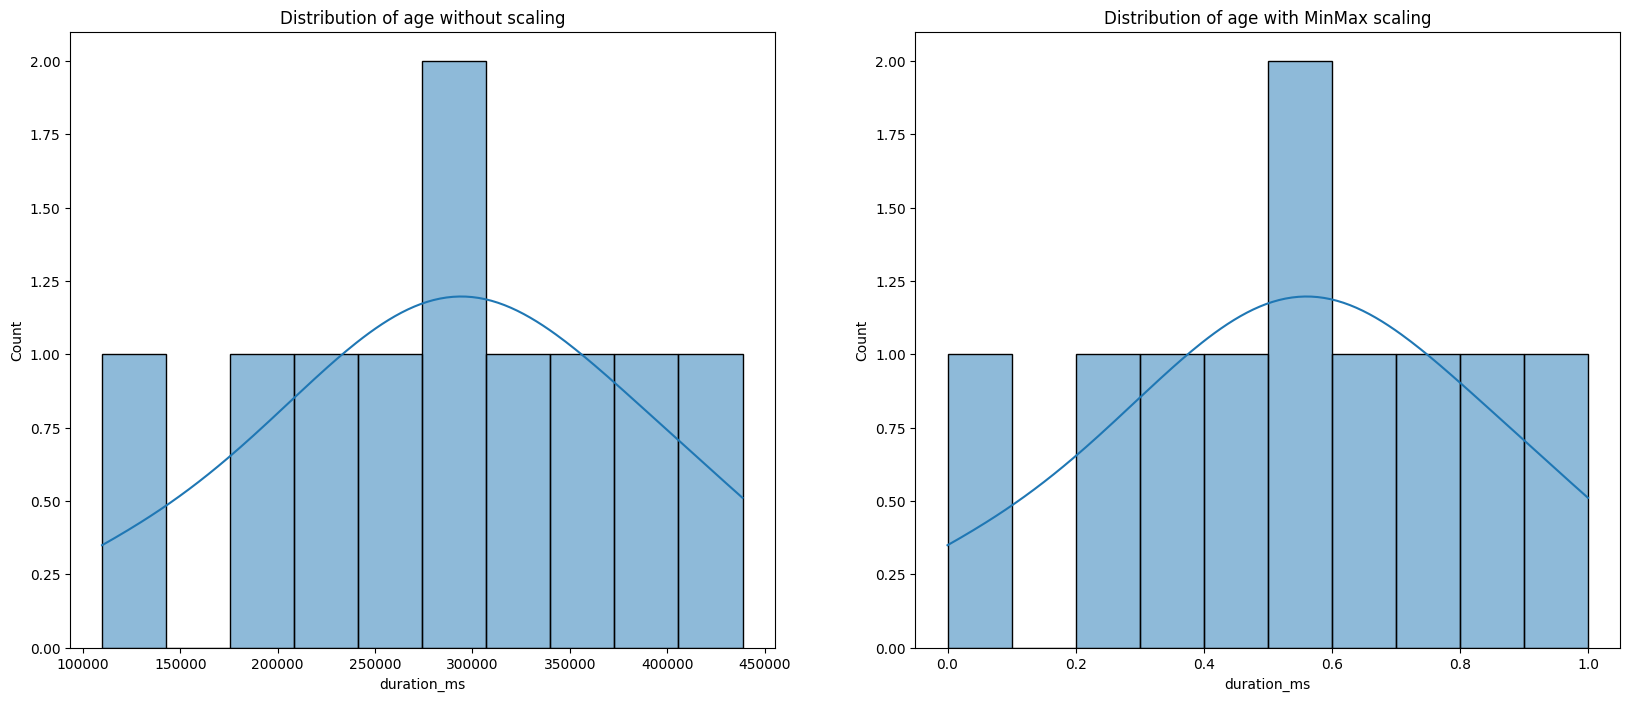

In [21]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df.iloc[:,-2], bins=10, kde=True, ax=ax1);
sns.histplot(trans_scaler_1.iloc[:,-2], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of age without scaling')
ax2.set_title('Distribution of age with MinMax scaling')

plt.show()

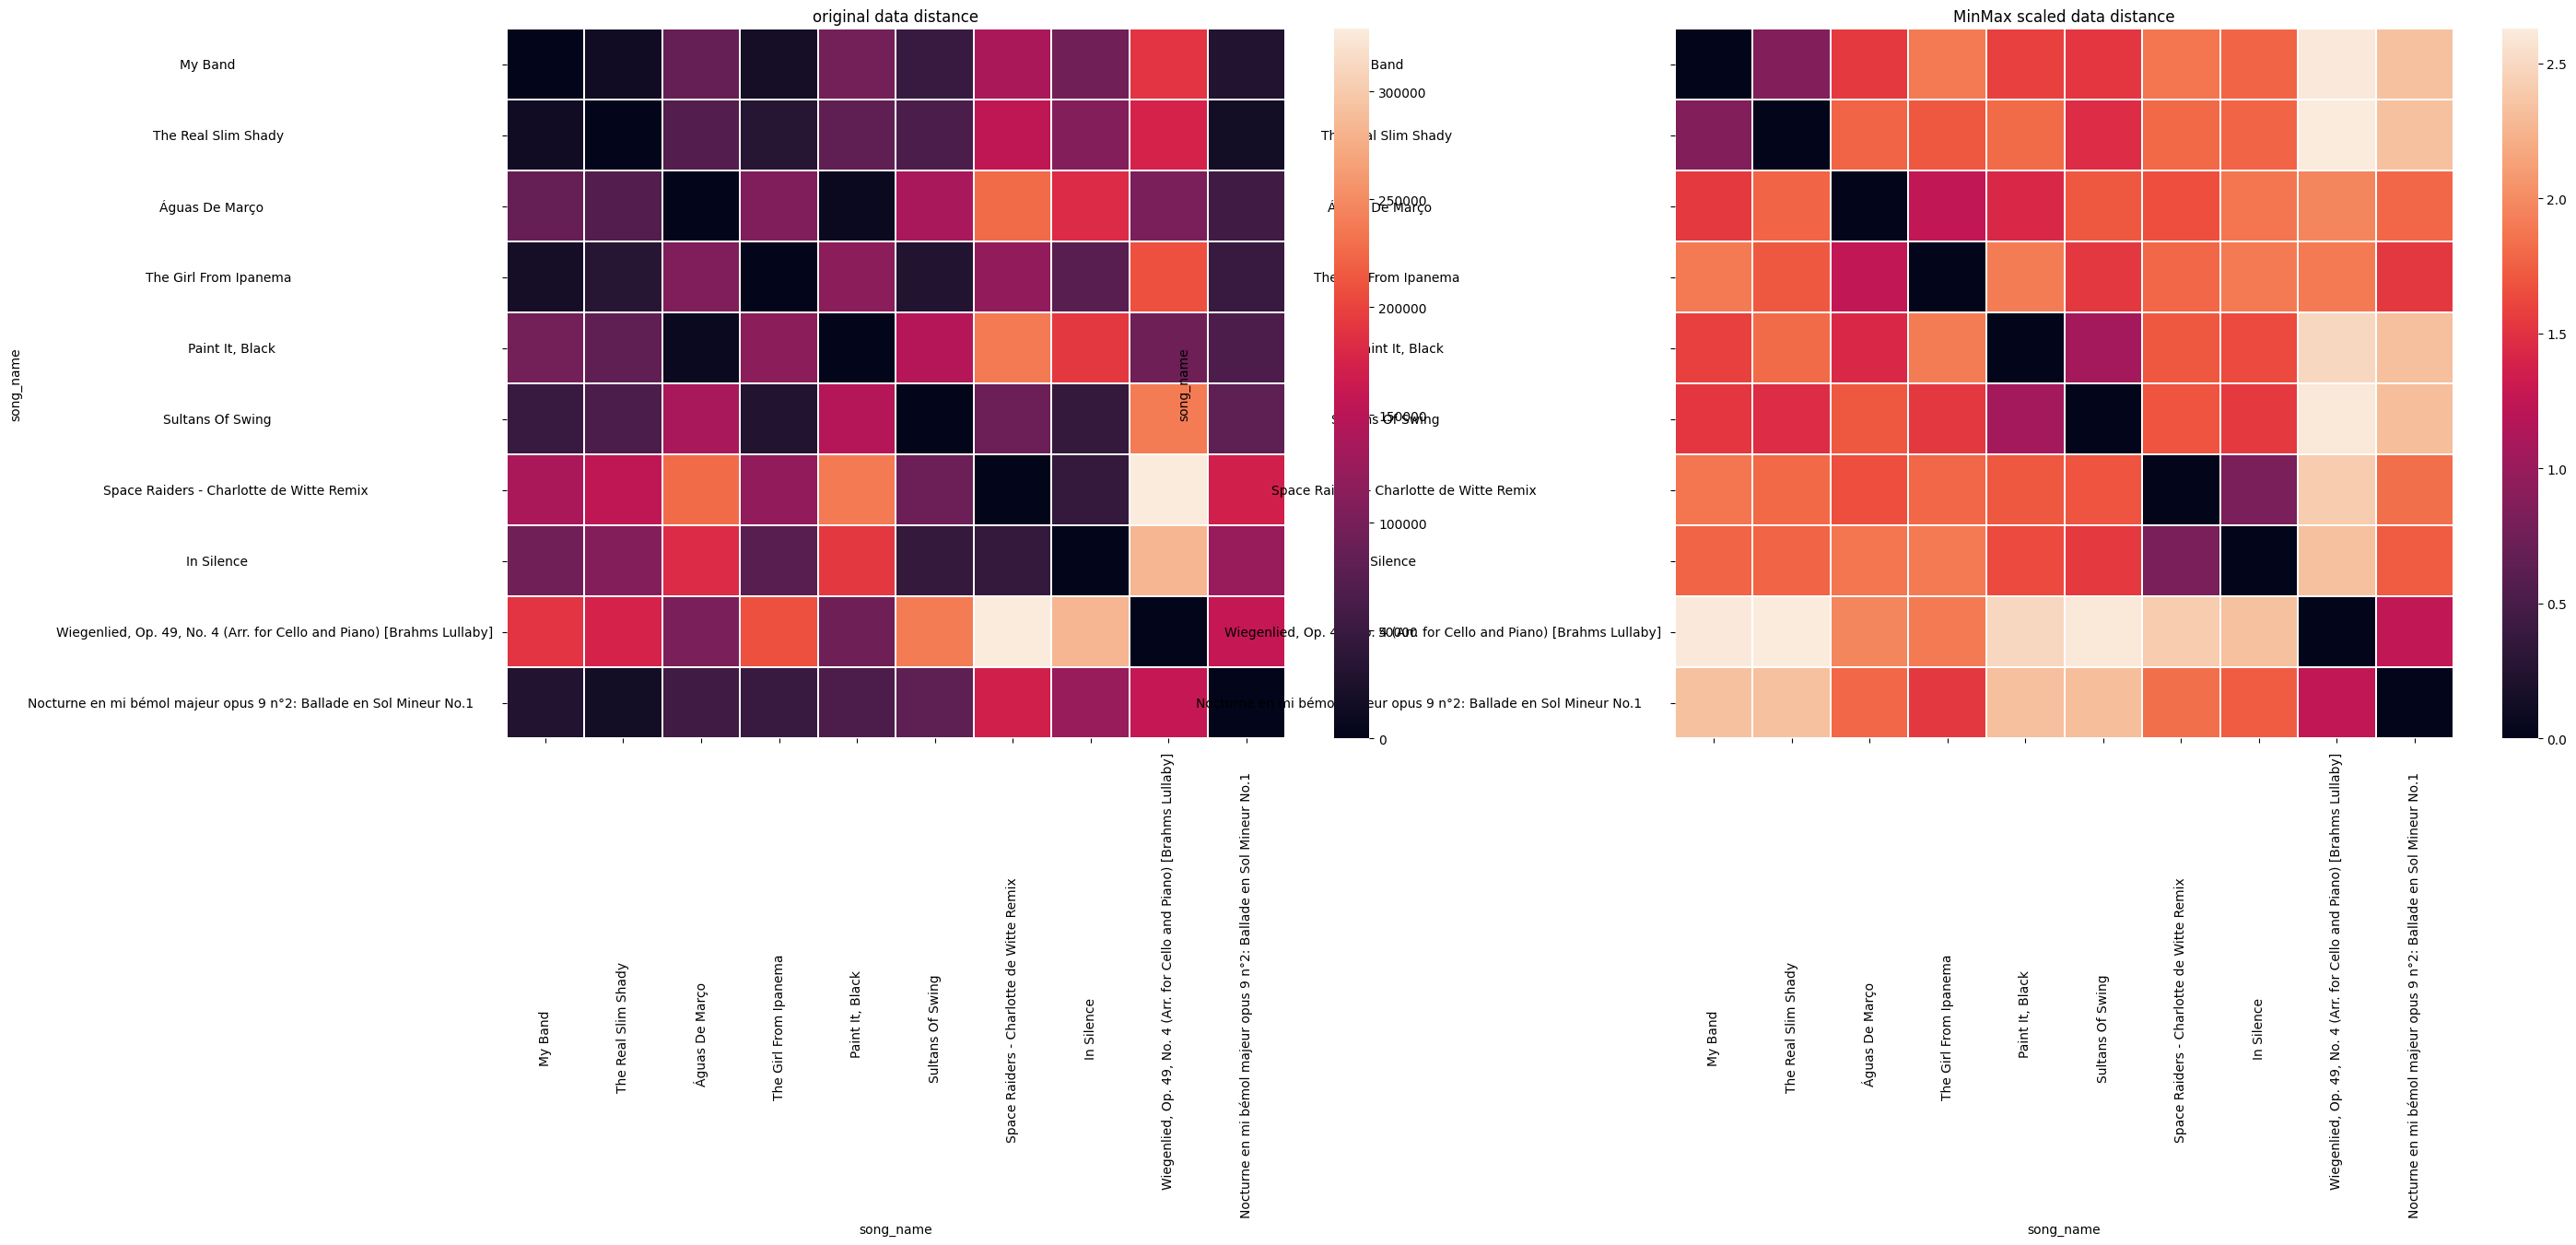

In [22]:
# comparing original data distance vs. with MinMax scaled data distance
# Making the DataFrame for the MinMaxed heatmap
pairwise_minmax_dis = pd.DataFrame(pairwise_distances(trans_scaler_1),
                                         index=df.index,
                                         columns=df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

# Plotting the two plots
sns.heatmap(pairwise_dis_df, ax=ax1, linewidths=.2);
sns.heatmap(pairwise_minmax_dis, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('original data distance')
ax2.set_title('MinMax scaled data distance')

plt.show()

* Standard scaler

In [23]:
scaler_2 = StandardScaler()

In [24]:
trans_scaler_2 = scaler_2.fit_transform(df)

In [25]:
trans_scaler_2

danceability    energy  \
song_name                                                                    
My Band                                        ...      1.000384  0.992687   
The Real Slim Shady                            ...      1.451340  0.424153   
Águas De Março                                 ...      0.038653 -0.549612   
The Girl From Ipanema                          ...      0.034052 -1.151411   
Paint It, Black                                ...     -0.780429  0.829385   
Sultans Of Swing                               ...      0.457397  0.826361   
Space Raiders - Charlotte de Witte Remix       ...      0.531023  0.635842   
In Silence                                     ...      0.471202  0.980591   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...     -2.068872 -1.549596   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...     -1.134751 -1.438400   

                                                         key  loudness  mode  \
song_name                                                                      
My Band                                        ... -1.138990  1.217434  -2.0   
The Real Slim Shady                            ...  0.759326  1.118976  -2.0   
Águas De Março                                 ... -0.189832 -0.168522   0.5   
The Girl From Ipanema                          ...  2.183063 -0.315694   0.5   
Paint It, Black                                ... -1.138990  0.544582   0.5   
Sultans Of Swing                               ...  0.759326  0.458132   0.5   
Space Raiders - Charlotte de Witte Remix       ...  0.284747  0.361846   0.5   
In Silence                                     ... -1.138990  0.230112   0.5   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... -0.189832 -2.226872   0.5   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... -0.189832 -1.219995   0.5   

                                                    speechiness  acousticness  \
song_name                                                                       
My Band                                        ...     0.435538      0.146786   
The Real Slim Shady                            ...    -0.299450     -0.952202   
Águas De Março                                 ...     2.077778      0.987271   
The Girl From Ipanema                          ...    -0.821981      1.017877   
Paint It, Black                                ...     0.716901     -0.907235   
Sultans Of Swing                               ...    -1.060278     -0.878748   
Space Raiders - Charlotte de Witte Remix       ...     1.159042     -1.015909   
In Silence                                     ...    -0.859305     -1.010400   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...    -0.451616      1.305102   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...    -0.896629      1.307456   

                                                    instrumentalness  \
song_name                                                              
My Band                                        ...         -0.816077   
The Real Slim Shady                            ...         -0.816082   
Águas De Março                                 ...         -0.816082   
The Girl From Ipanema                          ...         -0.811999   
Paint It, Black                                ...         -0.810080   
Sultans Of Swing                               ...         -0.725811   
Space Raiders - Charlotte de Witte Remix       ...          1.316484   
In Silence                                     ...          1.400114   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...          0.649903   
Nocturne en mi bémol majeur opus 9 n°2: Ballade...          1.429630   

                                                    liveness   valence  \
song_name                                                                
My Band                                        ... -0.349827  1.270021   
The Real Slim Shady                            ... -1.002517  0.994657   
Águas De Março      

In [26]:
pd.DataFrame({'original': df.iloc[:, -2],
 'min_max_scaler': trans_scaler_2.iloc[:, -2]}).sort_values(by='original')

original  min_max_scaler
song_name                                                                   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...    109800       -1.941067
Paint It, Black                                ...    202267       -0.930989
Águas De Março                                 ...    212400       -0.820299
Nocturne en mi bémol majeur opus 9 n°2: Ballade...    268427       -0.208279
The Real Slim Shady                            ...    284200       -0.035980
My Band                                        ...    298773        0.123210
The Girl From Ipanema                          ...    317987        0.333097
Sultans Of Swing                               ...    348624        0.667766
In Silence                                     ...    393740        1.160598
Space Raiders - Charlotte de Witte Remix       ...    438720        1.651944

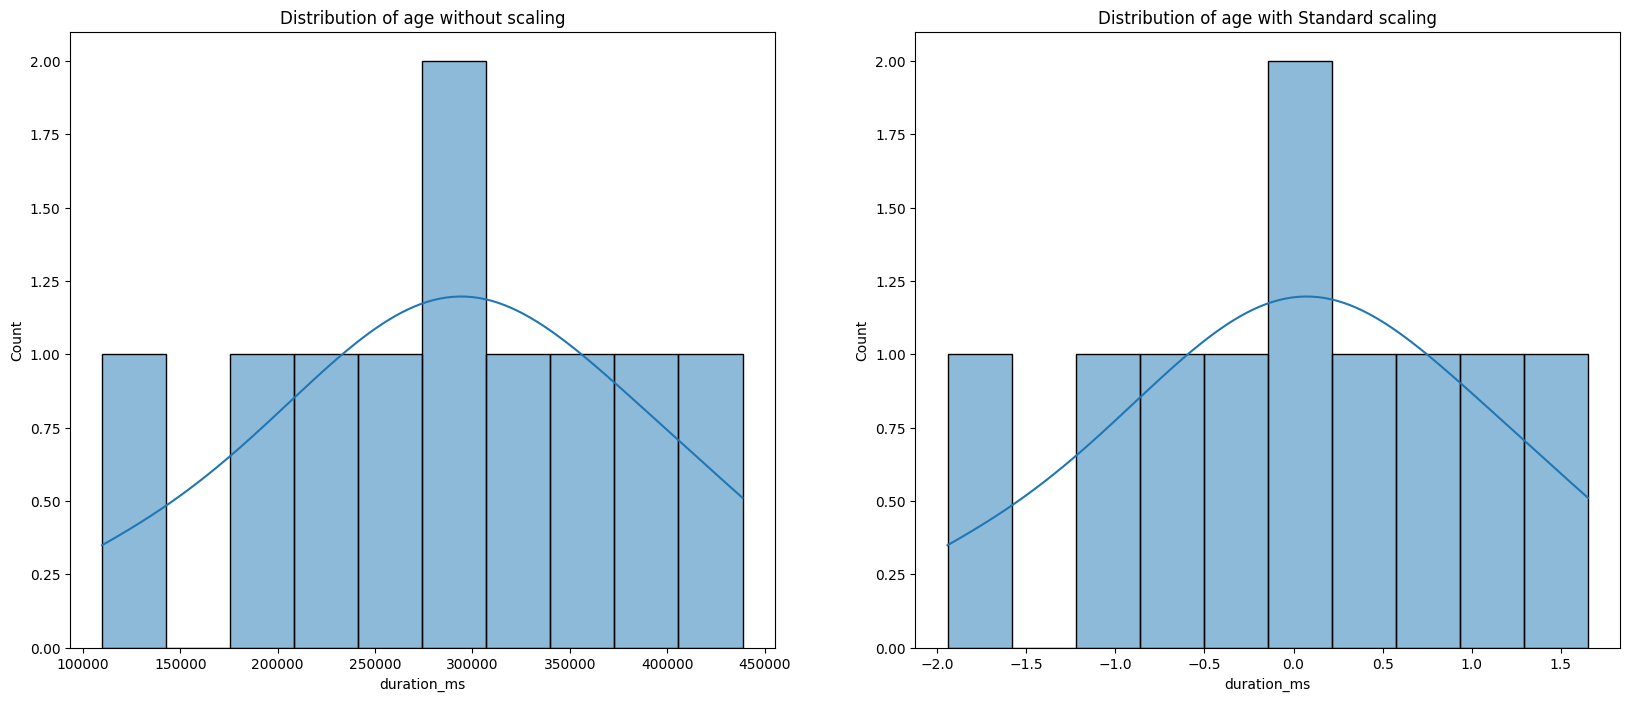

In [27]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df.iloc[:,-2], bins=10, kde=True, ax=ax1);
sns.histplot(trans_scaler_2.iloc[:,-2], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of age without scaling')
ax2.set_title('Distribution of age with Standard scaling')

plt.show()

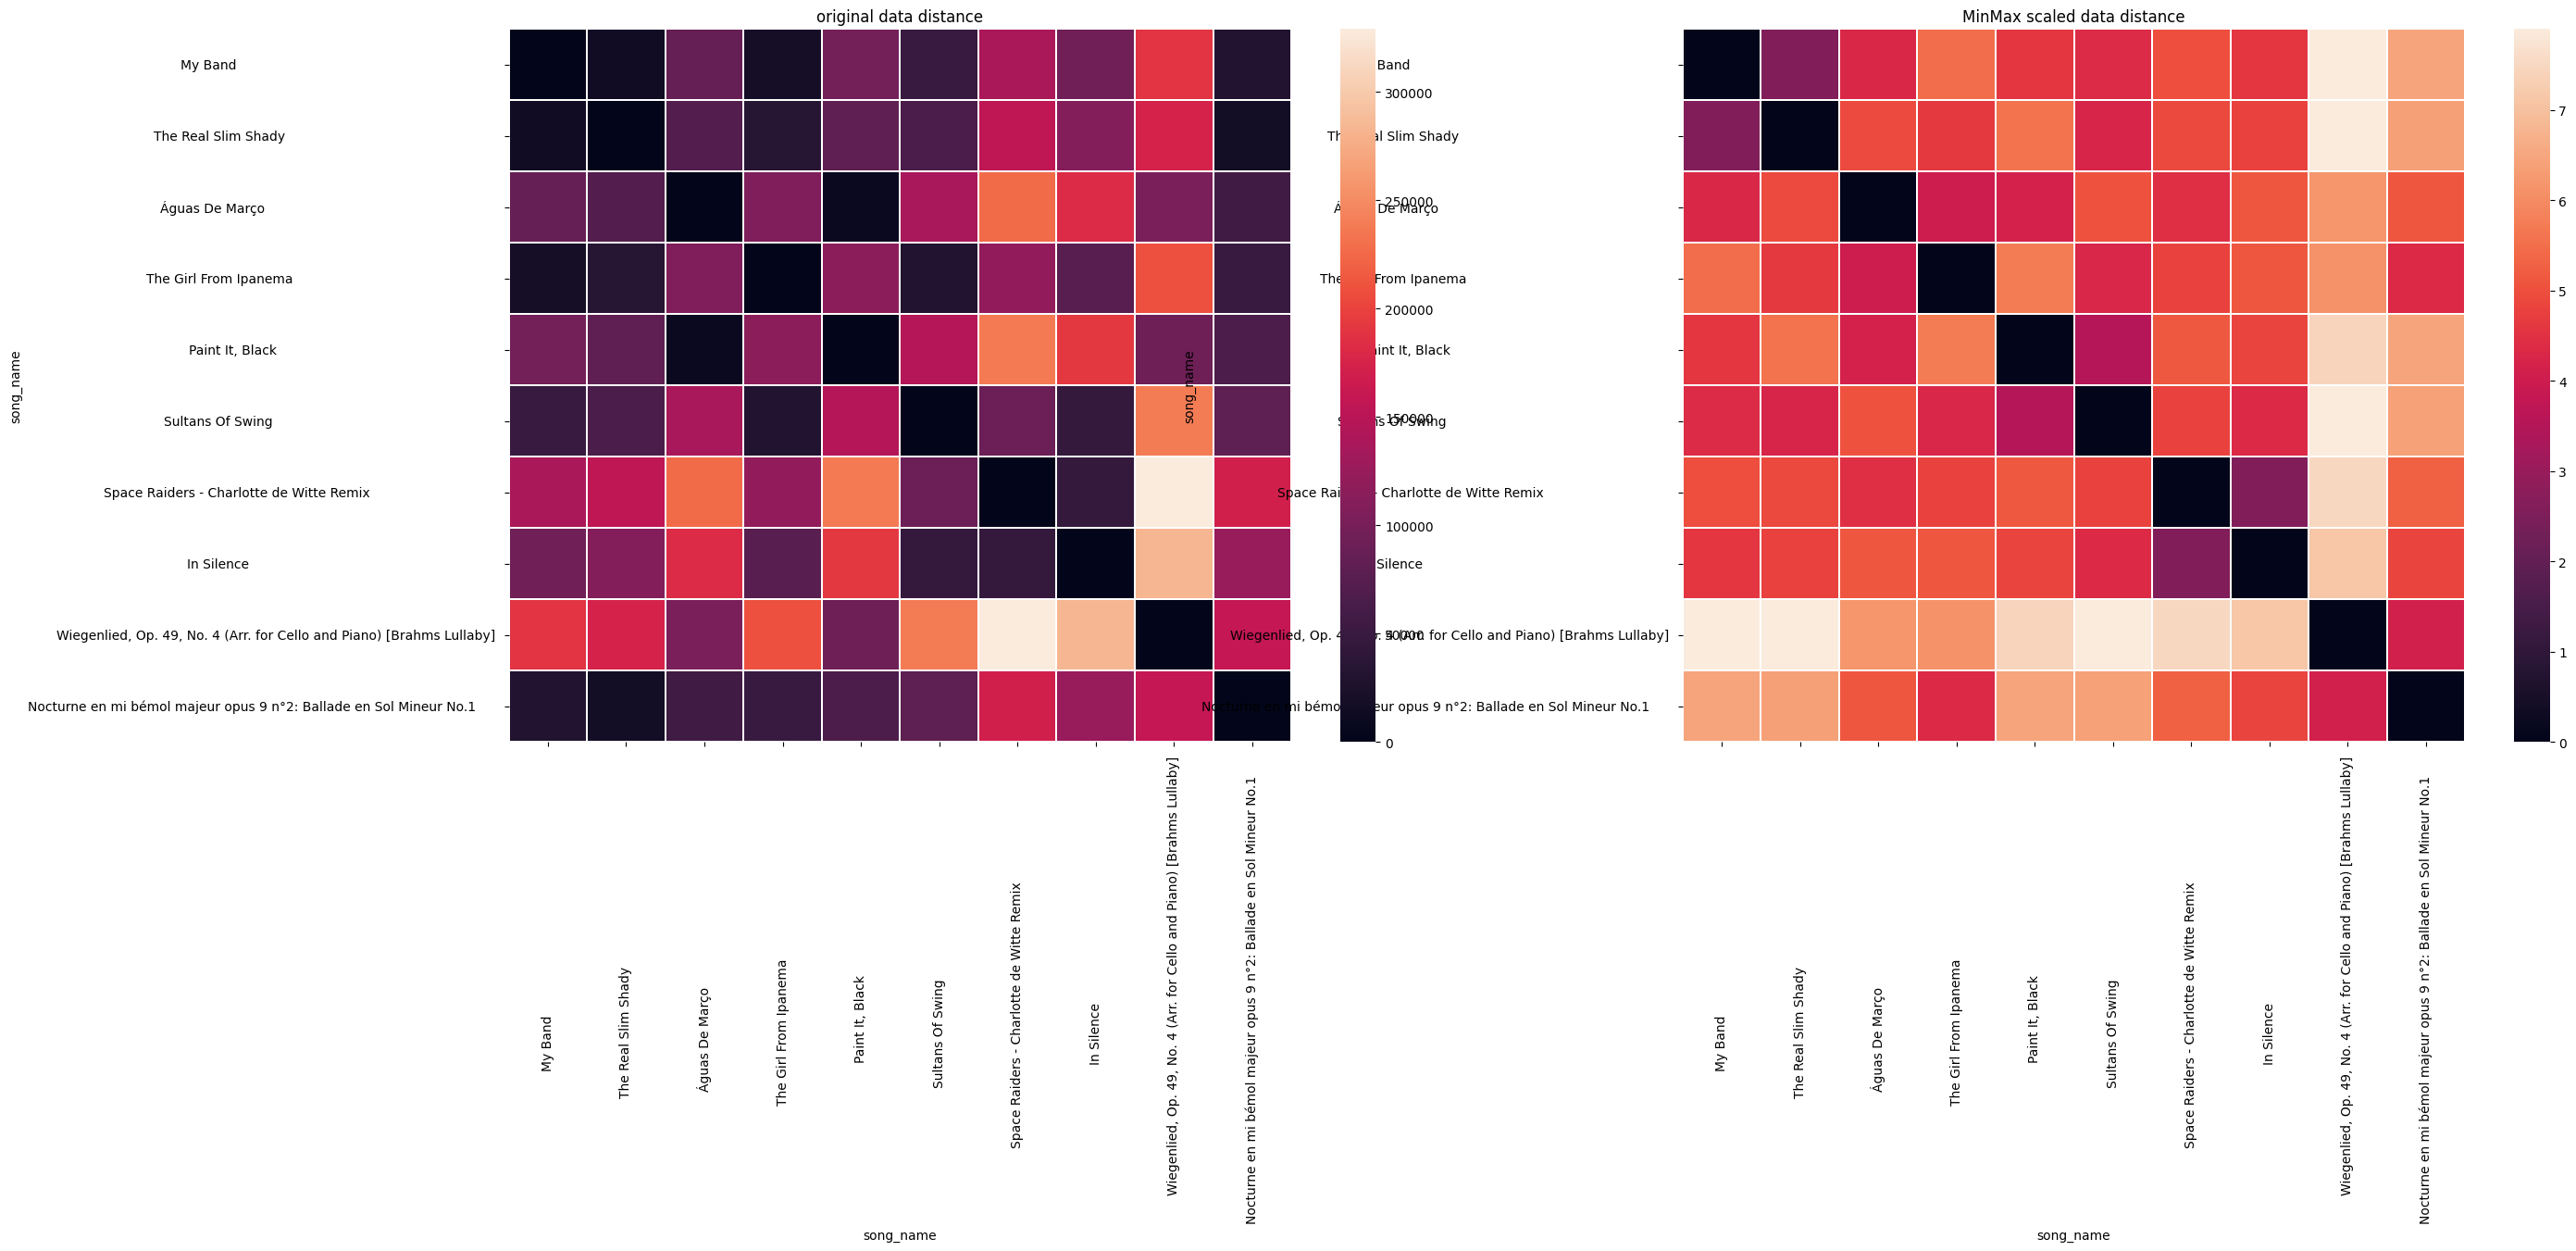

In [28]:
# comparing original data distance vs. with MinMax scaled data distance
# Making the DataFrame for the MinMaxed heatmap
pairwise_standard_dis = pd.DataFrame(pairwise_distances(trans_scaler_2),
                                         index=df.index,
                                         columns=df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

# Plotting the two plots
sns.heatmap(pairwise_dis_df, ax=ax1, linewidths=.2);
sns.heatmap(pairwise_standard_dis, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('original data distance')
ax2.set_title('MinMax scaled data distance')

plt.show()

In [29]:
from sklearn.cluster import KMeans
standard_obj = KMeans(n_clusters=3, random_state=10)
standard_obj.fit(trans_scaler_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [30]:
standard_obj.labels_

array([2, 2, 2, 1, 2, 2, 0, 0, 1, 1], dtype=int32)

In [31]:
minmax_obj = KMeans(n_clusters=3, random_state=10)
minmax_obj.fit(trans_scaler_1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [32]:
minmax_obj.labels_

array([1, 1, 1, 0, 1, 1, 2, 2, 0, 0], dtype=int32)

* I will continue with exploring transformers and fit them in KMeans

# Scaling 5000 spotify songs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.cluster import KMeans

In [3]:
# Read the CSV file
df_5 = pd.read_csv('/Users/samaardi/Desktop/WBS-Data Science Bootcamp/unsupervised machine learning/3_spotify_5000_songs.csv')

In [4]:
df_5.sample(20)

Unnamed: 0  \
2850        2850   
4343        4343   
826          826   
2273        2273   
1677        1677   
768          768   
4453        4453   
1536        1536   
1019        1019   
1592        1592   
4070        4070   
2619        2619   
4799        4799   
405          405   
77            77   
1904        1904   
4381        4381   
5224        5224   
4215        4215   
5011        5011   

     name                                                                                                                                                                               \
2850  We'll Be Coming Back (feat. Example)          ...                                                                                                                                  
4343  13th Moon                                     ...                                                                                                                                  
826   It Doesn't Matter Anymore                     ...                                                                                                                                  
2273  Get Ur Freak On                               ...                                                                                                                                  
1677  My Love                                       ...                                                                                                                                  
768   Bumpy Ride                                    ...                                                                                                                                  
4453  Purveyor of Fear                              ...                                                                                                                                  
1536  Pon de Replay                                 ...                                                                                                                                  
1019  Do You Believe in Magic?                      ...                                                                                                                                  
1592  Sk8er Boi                                     ...                                                                                                                                  
4070  By the Light                                  ...                                                                                                                                  
2619  My Baby Just Cares for Me - 2013 Remastered Ve...                                                                                                                                  
4799  So ein schöner Tag (Fliegerlied) - Party Mix  ...                                                                                                                                  
405   It's Your Thing                               ...                                                                                                                                  
77    Esperando Na Janela - Versão Acústica         ...                                                                                                                                  
1904  Vocalise No. 2 - Andantino                    ...                                                                                                                                  
4381  Black Winter Day                              ...                                                                                                                                  
5224  Symphony No. 6                                ...                                                                                                                                  
4215  Embrace the Death                            

In [5]:
df_5.columns = df_5.columns.str.strip()

In [6]:
df_5.columns

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')

In [7]:
df_5.drop(columns=['Unnamed: 0', 'type', 'duration_ms', 'id', 'html'], inplace=True)

In [8]:
df_5.set_index(['name', 'artist'], inplace=True)

In [9]:
minmax_scaler = MinMaxScaler()
# we fit and transform our data to minmax scaler to see the correlation after eliminating some columns
df_5_scaled = minmax_scaler.fit_transform(df_5)

In [11]:
from sklearn.decomposition import PCA
my_dv = PCA(n_components=1)
dance_val = my_dv.fit_transform(df_5_scaled[['danceability', 'valence']])

In [12]:
dance_val

pca0
name                                               artist                                                    
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     -0.023352
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.346032
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.586512
Mulher Eu Sei                                  ... Chico César                                       0.184532
Rosa Morena                                    ... Kurt Elling                                       0.051426
...                                                                                                       ...
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         -0.497364
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   -0.530532
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                -0.609171
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   -0.544404
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    -0.251017

[5235 rows x 1 columns]

In [13]:
my_dv_2 = PCA(n_components=1)
loud_energy_acc = my_dv_2.fit_transform(df_5_scaled[['loudness', 'energy', 'acousticness']])

In [14]:
loud_energy_acc

pca0
name                                               artist                                                    
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.564610
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.106964
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.085489
Mulher Eu Sei                                  ... Chico César                                       0.849554
Rosa Morena                                    ... Kurt Elling                                       0.841555
...                                                                                                       ...
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.882746
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.810941
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 1.007256
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    0.903218
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.794368

[5235 rows x 1 columns]

In [15]:
df_5_scaled['danceability_valence'] = dance_val

In [16]:
df_5_scaled['acoustic_loudness_energy'] = loud_energy_acc

In [17]:
df_5_scaled.drop(columns=['danceability', 'valence', 'energy', 'acousticness', 'loudness'], inplace=True)

In [18]:
df_5_scaled

key  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      1.000000   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.181818   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.181818   
Mulher Eu Sei                                  ... Chico César                                       0.363636   
Rosa Morena                                    ... Kurt Elling                                       0.545455   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.272727   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.545455   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 0.818182   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    0.363636   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.454545   

                                                                                                     mode  \
name                                               artist                                                   
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                       0.0   
Saudade De Bahia                               ... Antônio Carlos Jobim                               1.0   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                   1.0   
Mulher Eu Sei                                  ... Chico César                                        1.0   
Rosa Morena                                    ... Kurt Elling                                        1.0   
...                                                                                                   ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                           1.0   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                     1.0   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                  1.0   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                     1.0   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                      1.0   

                                                                                                     speechiness  \
name                                               artist                                                          
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                         0.076797   
Saudade De Bahia                               ... Antônio Carlos Jobim                                 0.037691   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                     0.377996   
Mulher Eu Sei                                  ... Chico César                                          0.051307   
Rosa Morena                                    ... Kurt Elling                                          0.041394   
...                                                                                                          ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                             0.051525   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                       0.048148   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold 

In [19]:
df_5_scaled.corr()

key      mode  speechiness  instrumentalness  \
key                       1.000000 -0.155697     0.027547         -0.016775   
mode                     -0.155697  1.000000    -0.041282         -0.003017   
speechiness               0.027547 -0.041282     1.000000         -0.064754   
instrumentalness         -0.016775 -0.003017    -0.064754          1.000000   
liveness                  0.025193 -0.009712     0.081963         -0.051664   
tempo                    -0.002370  0.004739     0.064255         -0.071945   
time_signature            0.007796 -0.013039     0.060871         -0.160122   
danceability_valence     -0.011586 -0.031172     0.006501         -0.571519   
acoustic_loudness_energy -0.027927  0.022326    -0.291437          0.205323   

                          liveness     tempo  time_signature  \
key                       0.025193 -0.002370        0.007796   
mode                     -0.009712  0.004739       -0.013039   
speechiness               0.081963  0.064255        0.060871   
instrumentalness         -0.051664 -0.071945       -0.160122   
liveness                  1.000000  0.036370        0.025039   
tempo                     0.036370  1.000000        0.024075   
time_signature            0.025039  0.024075        1.000000   
danceability_valence     -0.007911  0.064059        0.215361   
acoustic_loudness_energy -0.135373 -0.206786       -0.172970   

                          danceability_valence  acoustic_loudness_energy  
key                                  -0.011586                 -0.027927  
mode                                 -0.031172                  0.022326  
speechiness                           0.006501                 -0.291437  
instrumentalness                     -0.571519                  0.205323  
liveness                             -0.007911                 -0.135373  
tempo                                 0.064059                 -0.206786  
time_signature                        0.215361                 -0.172970  
danceability_valence                  1.000000                 -0.146330  
acoustic_loudness_energy             -0.146330                  1.000000

<Axes: >

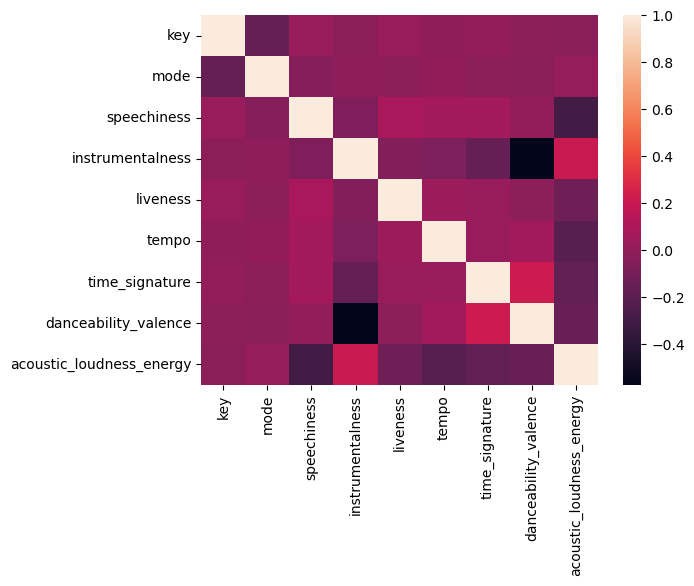

In [20]:
sns.heatmap(df_5_scaled.corr())

## importing ydata_profiling to get insights about our data

In [7]:
!pip install ydata_profiling

  Obtaining dependency information for ydata_profiling from https://files.pythonhosted.org/packages/33/85/45027914eb485482976883dcaab434eab99f1ed5cb222781e7ba46bdf3b7/ydata_profiling-4.8.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/ed/76/9a17032880ed27f2dbd490c77a3431cbc80f47ba81534131de3c2846e736/pydantic-2.7.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 3.9 MB/s eta 0:00:00
  Obtaining dependency information for visions[type_image_path]<0.7.7,>=0.7.5 from https://files.pythonhosted.org/packages/7c/bf/612b24e711ae25dea9af19b9304634b8949faa0b035fad47e8bcadf62f59/visions-0.7.6-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for phik<0.13,>=0.11.1 from https://files.pythonhosted.org/packages/b9/69/a42d9320b68b0d43d78db46787669b2287cba5e8db2e83fe0d63c1fd6945/phik-0.12.4-cp311-cp311-macosx_11_0_arm64.whl.metadata


In [8]:
from ydata_profiling import ProfileReport

In [699]:
ProfileReport(df_5_scaled)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [501]:
df_5.columns

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')

In [12]:
#pairwise_df_5 = pd.DataFrame(pairwise_distances(df_5),
                             #index=df_5.index,
                             #columns=df_5.index)

# Stating that we want two plots. we use pairedwise df to plot our heatmap
#fig, ax = plt.subplots(1, figsize=(20, 8))

#sns.heatmap(pairwise_df_5, ax=ax, linewidths=.2);

#ax.set_title('pairwise distance')
#plt.show()

In [590]:
columns = list(m_transformed.columns)
variance = []
for i in columns:
    variance.append(m_transformed[i].var())

In [591]:
variance

[0.05084209892360379,
 0.08313704589669817,
 0.010530643915136317,
 0.12774503947459473,
 0.0794983357996381]

## inertia method

In [55]:
seed = 42
max_k = 100
inertia_list=[]

for i in range(10, max_k + 1):
  df_5_kmean = KMeans(n_clusters= i,
                      n_init = "auto",
                    random_state= seed
                    )
  df_5_kmean.fit(df_5_scaled)
  inertia_list.append(df_5_kmean.inertia_)

In [56]:
inertia_list

[12822.27646129455,
 10387.16468174717,
 9379.577284323183,
 8887.212076158114,
 7422.498194601173,
 6769.702085047144,
 6379.165851718642,
 5828.303625278455,
 5593.988344787967,
 4869.810714314564,
 4374.722081947642,
 4376.987466112968,
 4014.1629433254357,
 3732.4150754673283,
 3404.450658834251,
 3298.3946620937554,
 3092.6560322036476,
 2898.130004721803,
 2698.507023831542,
 2415.1101824383586,
 2208.2648423972073,
 2057.938394886599,
 1863.3803240622412,
 1724.2836361847867,
 1603.3355598719147,
 1484.5963910643147,
 1351.3761605810241,
 1227.2553430481912,
 1156.8191172016375,
 1074.5814069915457,
 976.7946233652561,
 892.0576762729083,
 789.0062111317953,
 709.2447169779832,
 641.1419666855448,
 576.1423320871767,
 536.2813750741636,
 534.0257320340957,
 530.7593988878176,
 528.9153324496585,
 526.6435292927808,
 524.7935770180543,
 522.7842969998976,
 518.0516676376405,
 516.6837327909047,
 513.0214131022402,
 509.2107699667447,
 507.234823983181,
 505.58297424588505,
 504.1

/Users/samaardi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


()

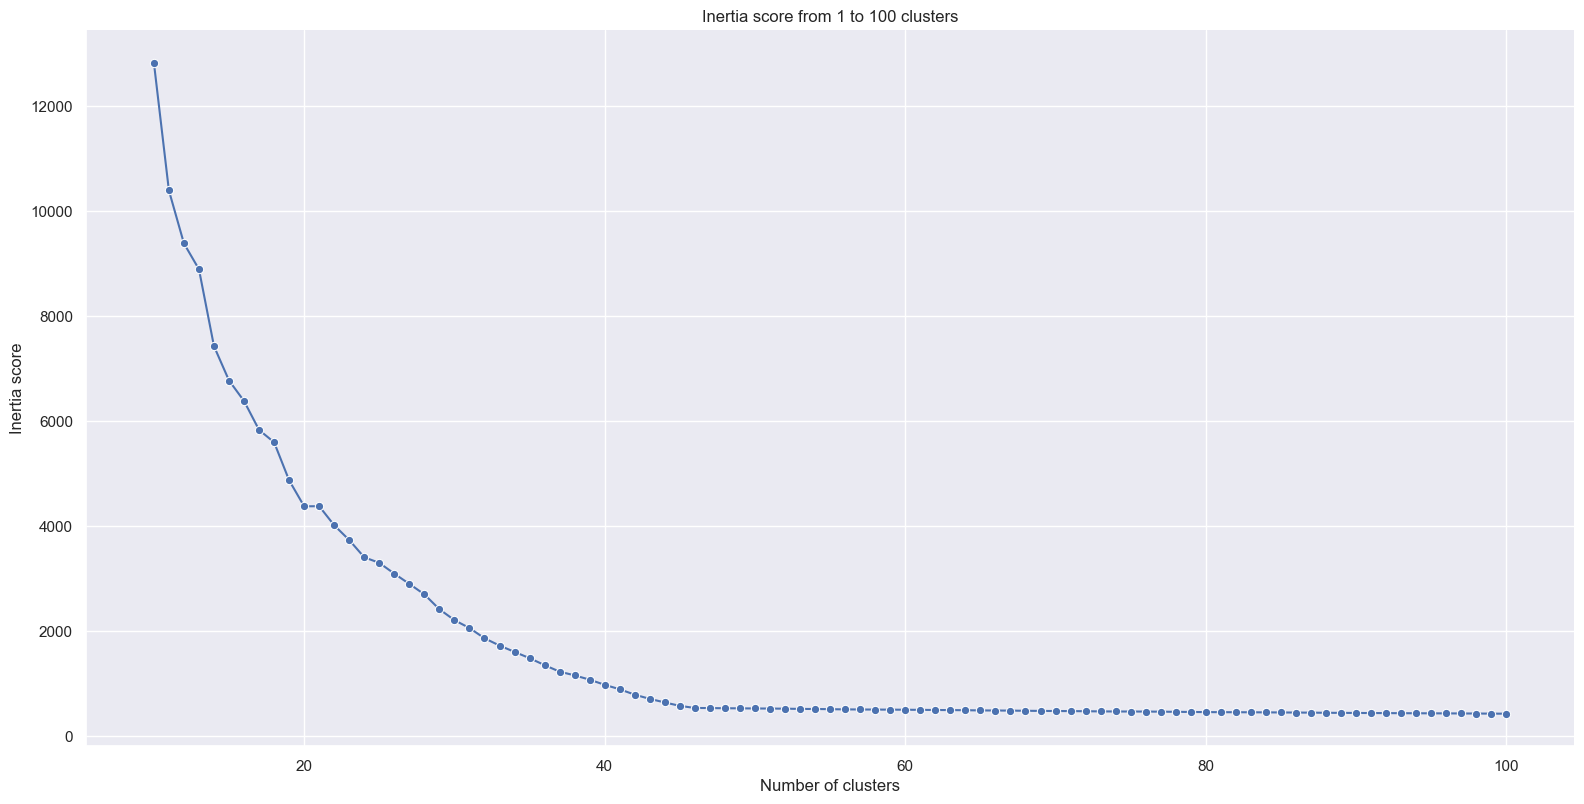

In [57]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')
%matplotlib inline
(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(10, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);()

## The silhouette coefficient

In [24]:
from sklearn.metrics import silhouette_score

In [58]:
max_k = 100
sil_list = []
for j in range(10, max_k + 1):
  s_kmeans = KMeans(n_clusters=j,
             n_init = "auto",
             random_state=seed)
  s_kmeans.fit(df_5_scaled)
  labels = s_kmeans.labels_
  score = silhouette_score(df_5_scaled, labels)
  sil_list.append(score)

/Users/samaardi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


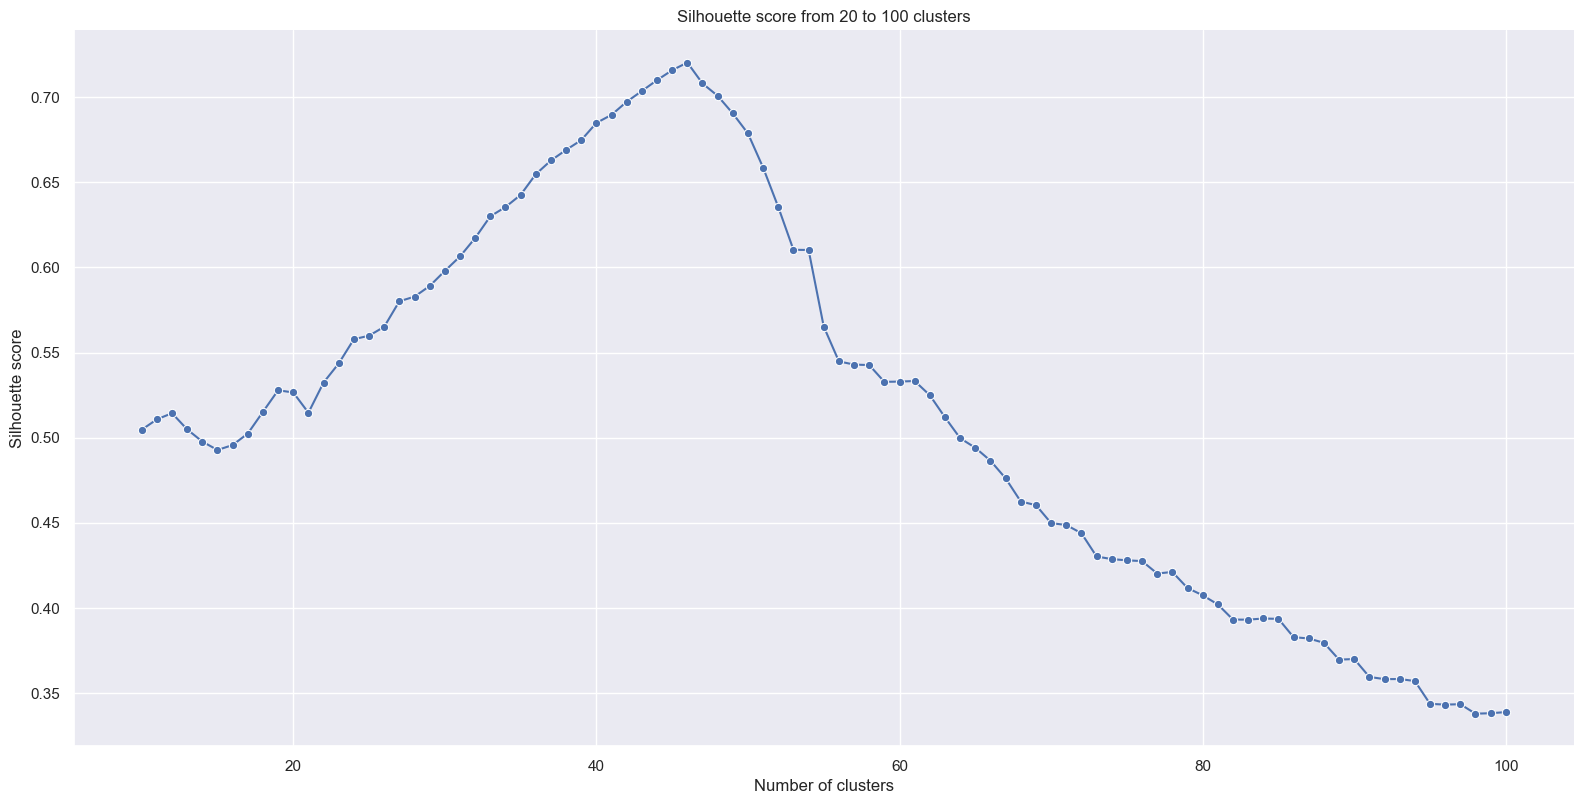

In [59]:
(
sns.relplot(y = sil_list,
            x = range(10, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 20 to {max_k } clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [27]:
s_kmeans = KMeans(n_clusters=46,
             n_init = "auto",
             random_state=seed)

s_kmeans.fit(df_5_scaled)

KMeans(n_clusters=46, n_init='auto', random_state=42)

In [28]:
s_kmeans.labels_

array([30, 34, 34, ..., 16, 28, 28], dtype=int32)

In [29]:
df_5_scaled['cluster'] = s_kmeans.labels_

In [42]:
cluster_1 = df_5_scaled.loc[df_5_scaled['cluster'] == 0, :]

In [44]:
cluster_1.sample(15)

key  \
name                                               artist                                                       
Porgy (I Loves You Porgy) - Outtake            ... Bill Evans Trio                                   0.454545   
Love Me Like You Do                            ... Henry Smith                                       0.727273   
Perfect                                        ... The Piano Guys                                    0.727273   
Fairytail                                      ... Phoria                                            0.454545   
Cursed                                         ... Morgoth                                           0.818182   
Lily of the Valley                             ... Eusebius                                          0.454545   
All of Me                                      ... Henry Smith                                       0.727273   
I Will Always Love You                         ... David Schultz                                     0.818182   
Yesterday                                      ... David Schultz                                     0.454545   
Overture (For Other Halfs)                     ... Brian McBride                                     0.636364   
Itusmo nando demo (from "Spirited Away") - Pian... Quiet Gaze                                        0.454545   
Symphony No.102 In B Flat Major, Hob.I:102: 1. ... Franz Joseph Haydn                                0.454545   
Fyrir Mikael                                   ... Eydís Evensen                                     0.454545   
Symphonie fantastique, Op. 14: Symphonie fantas... Hector Berlioz                                    0.909091   
Symphony No. 15 in A Major, Op. 141: I. Allegre... Dmitri Shostakovich                               0.909091   

                                                                                                     mode  \
name                                               artist                                                   
Porgy (I Loves You Porgy) - Outtake            ... Bill Evans Trio                                    1.0   
Love Me Like You Do                            ... Henry Smith                                        1.0   
Perfect                                        ... The Piano Guys                                     1.0   
Fairytail                                      ... Phoria                                             1.0   
Cursed                                         ... Morgoth                                            1.0   
Lily of the Valley                             ... Eusebius                                           1.0   
All of Me                                      ... Henry Smith                                        1.0   
I Will Always Love You                         ... David Schultz                                      1.0   
Yesterday                                      ... David Schultz                                      1.0   
Overture (For Other Halfs)                     ... Brian McBride                                      1.0   
Itusmo nando demo (from "Spirited Away") - Pian... Quiet Gaze                                         1.0   
Symphony No.102 In B Flat Major, Hob.I:102: 1. ... Franz Joseph Haydn                                 1.0   
Fyrir Mikael                                   ... Eydís Evensen                                      1.0   
Symphonie fantastique, Op. 14: Symphonie fantas... Hector Berlioz                                     1.0   
Symphony No. 15 in A Major, Op. 141: I. Allegre... Dmitri Shostakovich                                1.0   

                                                                                                     speechiness  \
name                                               artist                                                          
Porgy (I Loves You Porgy) - Outtake            ... Bill Evans Trio                                

In [45]:
cluster_2 = df_5_scaled.loc[df_5_scaled['cluster'] == 1, :]
cluster_2.sample(15)

key  \
name                                               artist                                                       
In Sufferance                                  ... Disincarnate                                      0.818182   
Bullshit Propaganda                            ... Extreme Noise Terror                              0.545455   
From The Valley Of Shadows                     ... Mortification                                     0.818182   
Pyramids                                       ... DVBBS                                             0.909091   
Body Count                                     ... Morgoth                                           0.909091   
No Jesus, No Beast                             ... Immolation                                        0.636364   
Blood Bath                                     ... Cancer                                            0.818182   
Eaten                                          ... Bloodbath                                         0.909091   
Tears                                          ... Desultory                                         0.727273   
L'enfant sauvage                               ... Gojira                                            0.727273   
Commandments                                   ... Pestilence                                        1.000000   
Sothis                                         ... Vader                                             0.909091   
Oh My - Club Mix                               ... The Partysquad                                    0.818182   
Go to Hell                                     ... Carcass                                           0.818182   
Mind Reflections                               ... Pestilence                                        1.000000   

                                                                                                     mode  \
name                                               artist                                                   
In Sufferance                                  ... Disincarnate                                       1.0   
Bullshit Propaganda                            ... Extreme Noise Terror                               1.0   
From The Valley Of Shadows                     ... Mortification                                      1.0   
Pyramids                                       ... DVBBS                                              1.0   
Body Count                                     ... Morgoth                                            1.0   
No Jesus, No Beast                             ... Immolation                                         1.0   
Blood Bath                                     ... Cancer                                             1.0   
Eaten                                          ... Bloodbath                                          1.0   
Tears                                          ... Desultory                                          1.0   
L'enfant sauvage                               ... Gojira                                             1.0   
Commandments                                   ... Pestilence                                         1.0   
Sothis                                         ... Vader                                              1.0   
Oh My - Club Mix                               ... The Partysquad                                     1.0   
Go to Hell                                     ... Carcass                                            1.0   
Mind Reflections                               ... Pestilence                                         1.0   

                                                                                                     speechiness  \
name                                               artist                                                          
In Sufferance                                  ... Disincarnate                                   

In [46]:
cluster_3 = df_5_scaled.loc[df_5_scaled['cluster'] == 2, :]
cluster_3.sample(15)

key  \
name                                               artist                                                       
Come Go With Me                                ... The Del-Vikings                                   0.454545   
Mad Love                                       ... Mabel                                             0.000000   
High Up                                        ... Jonathan Traylor                                  0.454545   
Hipsippy Blues                                 ... Art Blakey & The Jazz Messengers                  0.454545   
Eternal Flame                                  ... The Bangles                                       0.363636   
Autumn Leaves                                  ... Chet Baker                                        0.454545   
I Need A Girl PT II                            ... Diddy                                             0.090909   
Stormy Weather                                 ... Etta James                                        0.000000   
Mrs. Robinson - From "The Graduate" Soundtrack ... Simon & Garfunkel                                 0.545455   
Menina Moca                                    ... Stan Getz                                         0.363636   
7 rings                                        ... Ariana Grande                                     0.090909   
Mas Que Nada                                   ... Jorge Ben Jor                                     0.181818   
Wolke 4                                        ... Philipp Dittberner                                0.090909   
Chega De Saudade                               ... João Gilberto                                     0.363636   
Fighting Against Conviction                    ... Bunny Wailer                                      0.090909   

                                                                                                     mode  \
name                                               artist                                                   
Come Go With Me                                ... The Del-Vikings                                    0.0   
Mad Love                                       ... Mabel                                              0.0   
High Up                                        ... Jonathan Traylor                                   0.0   
Hipsippy Blues                                 ... Art Blakey & The Jazz Messengers                   0.0   
Eternal Flame                                  ... The Bangles                                        0.0   
Autumn Leaves                                  ... Chet Baker                                         0.0   
I Need A Girl PT II                            ... Diddy                                              0.0   
Stormy Weather                                 ... Etta James                                         0.0   
Mrs. Robinson - From "The Graduate" Soundtrack ... Simon & Garfunkel                                  0.0   
Menina Moca                                    ... Stan Getz                                          0.0   
7 rings                                        ... Ariana Grande                                      0.0   
Mas Que Nada                                   ... Jorge Ben Jor                                      0.0   
Wolke 4                                        ... Philipp Dittberner                                 0.0   
Chega De Saudade                               ... João Gilberto                                      0.0   
Fighting Against Conviction                    ... Bunny Wailer                                       0.0   

                                                                                                     speechiness  \
name                                               artist                                                          
Come Go With Me                                ... The Del-Vikings                                

In [47]:
cluster_4 = df_5_scaled.loc[df_5_scaled['cluster'] == 3, :]
cluster_4.sample(15)

key  \
name                                               artist                                                       
Without You (feat. Usher)                      ... David Guetta                                      0.181818   
Wichita Lineman - Remastered 2001              ... Glen Campbell                                     0.454545   
Da Doo Ron Ron (When He Walked Me Home)        ... The Crystals                                      0.272727   
Kogong                                         ... Mark Forster                                      0.090909   
Rette Mich                                     ... Tokio Hotel                                       0.181818   
Always Be My Baby                              ... Mariah Carey                                      0.363636   
He's a Doll                                    ... The Honeys                                        0.090909   
To Sir with Love                               ... Lulu                                              0.363636   
Hey                                            ... Andreas Bourani                                   0.090909   
Everybody's Talkin' - From "Midnight Cowboy"   ... Harry Nilsson                                     0.363636   
Tetragon                                       ... Joe Henderson                                     0.000000   
Story of My Life                               ... One Direction                                     0.272727   
Livin' Thing                                   ... Electric Light Orchestra                          0.000000   
(Everything I Do) I Do It For You              ... Bryan Adams                                       0.090909   
Auch im Regen                                  ... Rosenstolz                                        0.090909   

                                                                                                     mode  \
name                                               artist                                                   
Without You (feat. Usher)                      ... David Guetta                                       1.0   
Wichita Lineman - Remastered 2001              ... Glen Campbell                                      1.0   
Da Doo Ron Ron (When He Walked Me Home)        ... The Crystals                                       1.0   
Kogong                                         ... Mark Forster                                       1.0   
Rette Mich                                     ... Tokio Hotel                                        1.0   
Always Be My Baby                              ... Mariah Carey                                       1.0   
He's a Doll                                    ... The Honeys                                         1.0   
To Sir with Love                               ... Lulu                                               1.0   
Hey                                            ... Andreas Bourani                                    1.0   
Everybody's Talkin' - From "Midnight Cowboy"   ... Harry Nilsson                                      1.0   
Tetragon                                       ... Joe Henderson                                      1.0   
Story of My Life                               ... One Direction                                      1.0   
Livin' Thing                                   ... Electric Light Orchestra                           1.0   
(Everything I Do) I Do It For You              ... Bryan Adams                                        1.0   
Auch im Regen                                  ... Rosenstolz                                         1.0   

                                                                                                     speechiness  \
name                                               artist                                                          
Without You (feat. Usher)                      ... David Guetta                                   

In [48]:
cluster_5 = df_5_scaled.loc[df_5_scaled['cluster'] == 4, :]
cluster_5.sample(15)

key  \
name                                               artist                                                       
The Deceived Ones                              ... Opprobrium                                        0.727273   
Dusk Till Dawn - Radio Edit                    ... ZAYN                                              1.000000   
Deep In Your Subconcious                       ... Atrocity                                          0.727273   
Cleansed Of Impurity                           ... Solstice                                          0.727273   
You                                            ... Galantis                                          0.727273   
Cause of Death                                 ... Obituary                                          0.818182   
Punish My Heaven                               ... Dark Tranquillity                                 0.727273   
Razor Divine                                   ... Deranged                                          1.000000   
Arise                                          ... Sepultura                                         0.818182   
Crucifixation                                  ... Deicide                                           1.000000   
No Air (feat. Chris Brown)                     ... Jordin Sparks                                     0.727273   
Howl At The Moon - Radio Edit                  ... Stadiumx                                          0.909091   
My Love                                        ... Martin Solveig                                    0.818182   
Coronation of Our Domain                       ... Malevolent Creation                               0.909091   
Under and Over It                              ... Five Finger Death Punch                           1.000000   

                                                                                                     mode  \
name                                               artist                                                   
The Deceived Ones                              ... Opprobrium                                         0.0   
Dusk Till Dawn - Radio Edit                    ... ZAYN                                               0.0   
Deep In Your Subconcious                       ... Atrocity                                           0.0   
Cleansed Of Impurity                           ... Solstice                                           0.0   
You                                            ... Galantis                                           0.0   
Cause of Death                                 ... Obituary                                           0.0   
Punish My Heaven                               ... Dark Tranquillity                                  0.0   
Razor Divine                                   ... Deranged                                           0.0   
Arise                                          ... Sepultura                                          0.0   
Crucifixation                                  ... Deicide                                            0.0   
No Air (feat. Chris Brown)                     ... Jordin Sparks                                      0.0   
Howl At The Moon - Radio Edit                  ... Stadiumx                                           0.0   
My Love                                        ... Martin Solveig                                     0.0   
Coronation of Our Domain                       ... Malevolent Creation                                0.0   
Under and Over It                              ... Five Finger Death Punch                            0.0   

                                                                                                     speechiness  \
name                                               artist                                                          
The Deceived Ones                              ... Opprobrium                                     

In [32]:
cluster_1.shape

(172, 10)

In [35]:
cluster_27 = df_5_scaled.loc[df_5_scaled['cluster'] == 26, :]
cluster_27.sample(20)

key  \
name                                               artist                                                       
Helium - Piano Version                         ... Sia Furler                                        0.363636   
Someone You Loved - Piano Version              ... Flying Fingers                                    0.090909   
Someone You Loved                              ... The Piano Guys                                    0.090909   
Prelude No. 1 in C Major                       ... Dmitri Shostakovich                               0.000000   
At Last (Solo Piano Version)                   ... Alexis Ffrench                                    0.090909   
Russian Snow                                   ... Lucette Bourdin                                   0.000000   
Imagine                                        ... 2CELLOS                                           0.000000   
Sleep                                          ... Goldbæk                                           0.181818   
Diabelli Variations - 33 Variations on a Waltz ... Ludwig van Beethoven                              0.000000   
Tora                                           ... Wide Eyed                                         0.000000   
A Rainbow in the Curved Air - Instrumental     ... Terry Riley                                       0.181818   
Handel Sarabande Variation (Arr. for Piano from... George Frideric Handel                            0.090909   
Ambre                                          ... Nils Frahm                                        0.090909   
Air on a G String                              ... Johann Sebastian Bach                             0.181818   
Another Hike                                   ... Hauschka                                          0.000000   
La Javanaise                                   ... Serge Gainsbourg                                  0.000000   
Variation XVIII - Andante cantabile            ... Sergei Rachmaninoff                               0.090909   
Wake Me Up                                     ... Andy Stringer                                     0.181818   
Symphony in D, H.I No.6 - "Le Matin": 1. Adagio... Franz Joseph Haydn                                0.181818   
Elisabeth                                      ... Lucas Forch                                       0.272727   

                                                                                                     mode  \
name                                               artist                                                   
Helium - Piano Version                         ... Sia Furler                                         1.0   
Someone You Loved - Piano Version              ... Flying Fingers                                     1.0   
Someone You Loved                              ... The Piano Guys                                     1.0   
Prelude No. 1 in C Major                       ... Dmitri Shostakovich                                1.0   
At Last (Solo Piano Version)                   ... Alexis Ffrench                                     1.0   
Russian Snow                                   ... Lucette Bourdin                                    1.0   
Imagine                                        ... 2CELLOS                                            1.0   
Sleep                                          ... Goldbæk                                            1.0   
Diabelli Variations - 33 Variations on a Waltz ... Ludwig van Beethoven                               1.0   
Tora                                           ... Wide Eyed                                          1.0   
A Rainbow in the Curved Air - Instrumental     ... Terry Riley                                        1.0   
Handel Sarabande Variation (Arr. for Piano from... George Frideric Handel                             1.0   
Ambre                                          ... Nils Frahm                                

In [37]:
cluster_19 = df_5_scaled.loc[df_5_scaled['cluster'] == 18, :]
cluster_19.sample(20)

key  \
name                                               artist                                                       
Sexy Bitch (feat. Akon)                        ... David Guetta                                      1.000000   
Señorita                                       ... Shawn Mendes                                      0.818182   
Hips Don't Lie (feat. Wyclef Jean)             ... Shakira                                           0.909091   
White Noise                                    ... Disclosure                                        0.909091   
You Make Me Feel Like Dancing - Remastered     ... Leo Sayer                                         0.727273   
That Don't Impress Me Much                     ... Shania Twain                                      0.909091   
Mensch                                         ... Herbert Grönemeyer                                1.000000   
Te la Tiro Pa Que Bailes                       ... Dj Joe                                            0.727273   
No Se Si Fue                                   ... Arcangel                                          1.000000   
If I Can't                                     ... 50 Cent                                           1.000000   
Calma - Remix                                  ... Pedro Capó                                        1.000000   
Billie Jean                                    ... Michael Jackson                                   1.000000   
Bettina, zieh dir bitte etwas an               ... Modeselektor                                      1.000000   
+1 - Radio Edit                                ... Martin Solveig                                    1.000000   
Já Sei Namorar - 2004 Digital Remaster         ... Tribalistas                                       0.818182   
Blanco                                         ... J Balvin                                          0.818182   
Já Sei Namorar - 2004 Digital Remaster         ... Tribalistas                                       0.818182   
Dance (A$$) Remix                              ... Big Sean                                          1.000000   
Te Boté - Remix                                ... Nio Garcia                                        1.000000   
No Me Conoce - Remix                           ... Jhay Cortez                                       0.909091   

                                                                                                     mode  \
name                                               artist                                                   
Sexy Bitch (feat. Akon)                        ... David Guetta                                       0.0   
Señorita                                       ... Shawn Mendes                                       0.0   
Hips Don't Lie (feat. Wyclef Jean)             ... Shakira                                            0.0   
White Noise                                    ... Disclosure                                         0.0   
You Make Me Feel Like Dancing - Remastered     ... Leo Sayer                                          0.0   
That Don't Impress Me Much                     ... Shania Twain                                       0.0   
Mensch                                         ... Herbert Grönemeyer                                 0.0   
Te la Tiro Pa Que Bailes                       ... Dj Joe                                             0.0   
No Se Si Fue                                   ... Arcangel                                           0.0   
If I Can't                                     ... 50 Cent                                            0.0   
Calma - Remix                                  ... Pedro Capó                                         0.0   
Billie Jean                                    ... Michael Jackson                                    0.0   
Bettina, zieh dir bitte etwas an               ... Modeselektor                              

In [38]:
cluster_41 = df_5_scaled.loc[df_5_scaled['cluster'] == 40, :]
cluster_41.sample(20)

key  \
name                                               artist                                                       
White Rabbit (feat. Pep & Rash)                ... Sander van Doorn                                  1.000000   
Prinzesschen                                   ... LaFee                                             0.818182   
La Playa                                       ... Myke Towers                                       0.909091   
Iris                                           ... The Goo Goo Dolls                                 1.000000   
Sweet Nothing (feat. Florence Welch)           ... Calvin Harris                                     0.727273   
Blackeye                                       ... Love Inks                                         1.000000   
Whatever You Like                              ... T.I.                                              0.818182   
New Rules                                      ... Dua Lipa                                          0.818182   
Cold (feat. Future)                            ... Maroon 5                                          0.818182   
Engel (feat. Gim) - Radio Edit                 ... Ben                                               0.909091   
Justified & Ancient                            ... The KLF                                           0.909091   
Don't You Worry Child (Radio Edit) [feat. John ... Swedish House Mafia                               1.000000   
Mercy                                          ... Shawn Mendes                                      1.000000   
Over Everything                                ... Courtney Barnett                                  1.000000   
Don't You Worry Child - Radio Edit             ... Swedish House Mafia                               1.000000   
Throw Myself A Party                           ... Cashmere Cat                                      0.727273   
Halo                                           ... Beyoncé                                           1.000000   
Cudi the Kid (feat. Kid Cudi & Travis Barker) (... Steve Aoki                                        1.000000   
Dancing In The Street - Single Version         ... Martha Reeves & The Vandellas                     1.000000   
Love Someone                                   ... Lukas Graham                                      0.818182   

                                                                                                     mode  \
name                                               artist                                                   
White Rabbit (feat. Pep & Rash)                ... Sander van Doorn                                   0.0   
Prinzesschen                                   ... LaFee                                              0.0   
La Playa                                       ... Myke Towers                                        0.0   
Iris                                           ... The Goo Goo Dolls                                  0.0   
Sweet Nothing (feat. Florence Welch)           ... Calvin Harris                                      0.0   
Blackeye                                       ... Love Inks                                          0.0   
Whatever You Like                              ... T.I.                                               0.0   
New Rules                                      ... Dua Lipa                                           0.0   
Cold (feat. Future)                            ... Maroon 5                                           0.0   
Engel (feat. Gim) - Radio Edit                 ... Ben                                                0.0   
Justified & Ancient                            ... The KLF                                            0.0   
Don't You Worry Child (Radio Edit) [feat. John ... Swedish House Mafia                                0.0   
Mercy                                          ... Shawn Mendes                              

In [ ]:
df_5_scaled.drop(columns=[''])

In [726]:
s_kmeans.cluster_centers_

array([[ 6.65501166e-01,  1.00000000e+00,  5.11032903e-02,
         8.77482754e-01,  1.46742265e-01,  6.78510858e-01,
         7.28205128e-01, -3.27380777e-01,  8.48034631e-01],
       [ 7.65856237e-01,  1.00000000e+00,  1.31901378e-01,
         1.09820169e-01,  1.94726208e-01,  5.65339420e-01,
         7.73255814e-01, -3.42553893e-01, -3.97657707e-01],
       [ 2.49795250e-01,  0.00000000e+00,  9.56171858e-02,
         3.39633174e-02,  1.63354236e-01,  5.48614926e-01,
         7.81981982e-01,  1.86823275e-01,  3.88906044e-01],
       [ 1.70653907e-01,  1.00000000e+00,  5.48025838e-02,
         1.57755354e-02,  1.58308004e-01,  5.68465119e-01,
         7.85964912e-01, -3.76719299e-02,  1.49169001e-01],
       [ 9.00432900e-01,  0.00000000e+00,  1.25417574e-01,
         6.53216089e-02,  2.17301105e-01,  5.74734856e-01,
         7.83333333e-01, -2.90258309e-01, -3.69207664e-01],
       [ 2.50201126e-01,  1.11022302e-16,  4.87612547e-02,
         8.84910831e-01,  1.37044409e-01,  4.672766

In [609]:
len(s_kmeans.cluster_centers_)

47

In [457]:
centroid_1 = s_kmeans.cluster_centers_[0]

In [458]:
centroid_1

array([0.43063968, 0.03382301, 0.30426716, 0.50403093, 0.25208536,
       0.74285714])

### we do clutering again by PCR analysis to see if it changes 

In [727]:
df_5_scaled

key  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      1.000000   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.181818   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.181818   
Mulher Eu Sei                                  ... Chico César                                       0.363636   
Rosa Morena                                    ... Kurt Elling                                       0.545455   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.272727   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.545455   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 0.818182   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    0.363636   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.454545   

                                                                                                     mode  \
name                                               artist                                                   
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                       0.0   
Saudade De Bahia                               ... Antônio Carlos Jobim                               1.0   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                   1.0   
Mulher Eu Sei                                  ... Chico César                                        1.0   
Rosa Morena                                    ... Kurt Elling                                        1.0   
...                                                                                                   ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                           1.0   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                     1.0   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                  1.0   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                     1.0   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                      1.0   

                                                                                                     speechiness  \
name                                               artist                                                          
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                         0.076797   
Saudade De Bahia                               ... Antônio Carlos Jobim                                 0.037691   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                     0.377996   
Mulher Eu Sei                                  ... Chico César                                          0.051307   
Rosa Morena                                    ... Kurt Elling                                          0.041394   
...                                                                                                          ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                             0.051525   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                       0.048148   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold 

In [728]:
df_5_scaled.drop('cluster', inplace=True)

In [ ]:
from sklearn.decomposition import PCA

In [570]:
my_pca = PCA(n_components = 2)

In [571]:
pca_variance_df = my_pca.fit_transform(m_transformed)

In [572]:
pca_variance_df

pca0  \
name                                               artist                                                        
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      -7.384410   
Saudade De Bahia                               ... Antônio Carlos Jobim                              11.615328   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  10.614256   
Mulher Eu Sei                                  ... Chico César                                       -7.383129   
Rosa Morena                                    ... Kurt Elling                                       -7.383615   
...                                                                                                        ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                           6.615591   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                     6.615384   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                -17.383815   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                     6.615789   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     20.615934   

                                                                                                         pca1  
name                                               artist                                                      
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.205311  
Saudade De Bahia                               ... Antônio Carlos Jobim                             -0.196276  
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 -0.552941  
Mulher Eu Sei                                  ... Chico César                                       0.121397  
Rosa Morena                                    ... Kurt Elling                                       0.216845  
...                                                                                                       ...  
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.724958  
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.736617  
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 0.925214  
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    0.804881  
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.511190  

[5235 rows x 2 columns]

In [573]:
v_array = my_pca.explained_variance_ratio_

In [574]:
v_array

array([0.99790732, 0.00112545])

In [537]:
my_kmeans = KMeans(n_clusters=39,
                  n_init = "auto",
                  random_state=seed)

In [576]:
my_trans = my_kmeans.fit(pca_variance_df)

In [577]:
my_trans

KMeans(n_clusters=39, n_init='auto', random_state=42)

In [578]:
m_transformed['cluster'] = my_kmeans.labels_

In [579]:
m_transformed.loc[m_transformed['cluster'] == 1, :].sample(15)

danceability  \
name                                               artist                                                           
12 Inch - Dave Darell Mix                      ... Dave Darell                                           0.835574   
No Te Debí Besar                               ... C. Tangana                                            0.694933   
Gravel Pit                                     ... Wu-Tang Clan                                          0.811789   
Pompeii                                        ... Bastille                                              0.704240   
Blank Space                                    ... Taylor Swift                                          0.777663   
Five More Hours - Deorro x Chris Brown         ... Deorro                                                0.728025   
Keine Liebe                                    ... RIN                                                   0.845915   
One (Your Name) - Radio Edit                   ... Swedish House Mafia                                   0.758014   
Turn Me On (feat. Vula)                        ... Riton                                                 0.762151   
Mornin'                                        ... Star Slinger                                          0.695967   
Síguelo Bailando                               ... Ozuna                                                 0.884178   
I'm an Albatraoz                               ... AronChupa                                             0.913133   
Chica Ven Pa' Aca                              ... Plan B                                                0.865564   
Walking with Elephants                         ... Ten Walls                                             0.806618   
How Come                                       ... D12                                                   0.775595   

                                                                                                     energy  \
name                                               artist                                                     
12 Inch - Dave Darell Mix                      ... Dave Darell                                        0.880   
No Te Debí Besar                               ... C. Tangana                                         0.684   
Gravel Pit                                     ... Wu-Tang Clan                                       0.733   
Pompeii                                        ... Bastille                                           0.709   
Blank Space                                    ... Taylor Swift                                       0.678   
Five More Hours - Deorro x Chris Brown         ... Deorro                                             0.802   
Keine Liebe                                    ... RIN                                                0.795   
One (Your Name) - Radio Edit                   ... Swedish House Mafia                                0.673   
Turn Me On (feat. Vula)                        ... Riton                                              0.828   
Mornin'                                        ... Star Slinger                                       0.764   
Síguelo Bailando                               ... Ozuna                                              0.664   
I'm an Albatraoz                               ... AronChupa                                          0.817   
Chica Ven Pa' Aca                              ... Plan B                                             0.725   
Walking with Elephants                         ... Ten Walls                                          0.633   
How Come                                       ... D12                                                0.851   

                                                                                                     loudness  \
name                                               artist                                                     

In [541]:
m_transformed.loc[m_transformed['cluster'] == 5, :].sample(15)

danceability  \
name                                               artist                                                           
My Band                                        ... D12                                                   0.876939   
We Had Enough                                  ... Arnie Love & The Lovelettes                           0.821096   
You Sexy Thing                                 ... Hot Chocolate                                         0.817994   
Gloria                                         ... Laura Branigan                                        0.802482   
Vampiresa                                      ... Johnny Prez                                           0.890383   
Perro Fiel (feat. Nicky Jam)                   ... Shakira                                               0.775595   
Mis Canciones Hablan de Sexo                   ... Plan B                                                0.874871   
Al Natural                                     ... Tego Calderon                                         0.877973   
Atemlos durch die Nacht                        ... Helene Fischer                                        0.823164   
Rude                                           ... MAGIC!                                                0.799380   
Joana                                          ... Peter Wackel                                          0.789038   
That Don't Impress Me Much                     ... Shania Twain                                          0.768356   
Stumblin' In - 2017 Remaster                   ... Suzi Quatro                                           0.786970   
Argumento                                      ... Paulinho Da Viola                                     0.755946   
Poppin' Them Thangs                            ... G-Unit                                                0.794209   

                                                                                                     energy  \
name                                               artist                                                     
My Band                                        ... D12                                                0.854   
We Had Enough                                  ... Arnie Love & The Lovelettes                        0.766   
You Sexy Thing                                 ... Hot Chocolate                                      0.733   
Gloria                                         ... Laura Branigan                                     0.743   
Vampiresa                                      ... Johnny Prez                                        0.851   
Perro Fiel (feat. Nicky Jam)                   ... Shakira                                            0.760   
Mis Canciones Hablan de Sexo                   ... Plan B                                             0.805   
Al Natural                                     ... Tego Calderon                                      0.847   
Atemlos durch die Nacht                        ... Helene Fischer                                     0.738   
Rude                                           ... MAGIC!                                             0.758   
Joana                                          ... Peter Wackel                                       0.906   
That Don't Impress Me Much                     ... Shania Twain                                       0.873   
Stumblin' In - 2017 Remaster                   ... Suzi Quatro                                        0.723   
Argumento                                      ... Paulinho Da Viola                                  0.762   
Poppin' Them Thangs                            ... G-Unit                                             0.806   

                                                                                                     loudness  \
name                                               artist                                                     

In [394]:
m_transformed.loc[m_transformed['cluster'] == 32, :].sample(15)

energy  \
name                                               artist                                                     
Liebestraum, S. 541, No. 3                     ... Franz Liszt                                       0.0332   
Circle of Life - From "The Lion King"/Soundtrac... Elton John                                        0.3870   
Beethoven: Symphony No. 7 in A Major, Op. 92: I... Ludwig van Beethoven                              0.1370   
Someone Else's Song                            ... Wilco                                             0.2560   
My Foolish Heart                               ... Bill Evans Trio                                   0.1210   
Young And Foolish                              ... Bill Evans                                        0.0172   
Così fan tutte, K.588 / Act 1: "Al fato dan leg... Wolfgang Amadeus Mozart                           0.0748   
Liebestraum No. 3 in A-Flat Major, S. 541/3    ... Franz Liszt                                       0.0759   
Let's Do It                                    ... Eartha Kitt                                       0.0518   
Kiss the Rain                                  ... Yiruma                                            0.0958   
All of Me                                      ... Henry Smith                                       0.0775   
Conference Of The Birds                        ... Dave Holland Quartet                              0.1680   
Turangalila-symphonie: I. Introduction         ... Olivier Messiaen                                  0.3850   
Arc                                            ... Wide Eyed                                         0.0956   
River Flows in You                             ... Yiruma                                            0.2920   

                                                                                                          key  \
name                                               artist                                                       
Liebestraum, S. 541, No. 3                     ... Franz Liszt                                       0.727273   
Circle of Life - From "The Lion King"/Soundtrac... Elton John                                        0.909091   
Beethoven: Symphony No. 7 in A Major, Op. 92: I... Ludwig van Beethoven                              0.818182   
Someone Else's Song                            ... Wilco                                             0.818182   
My Foolish Heart                               ... Bill Evans Trio                                   0.818182   
Young And Foolish                              ... Bill Evans                                        0.818182   
Così fan tutte, K.588 / Act 1: "Al fato dan leg... Wolfgang Amadeus Mozart                           0.909091   
Liebestraum No. 3 in A-Flat Major, S. 541/3    ... Franz Liszt                                       0.727273   
Let's Do It                                    ... Eartha Kitt                                       0.727273   
Kiss the Rain                                  ... Yiruma                                            0.727273   
All of Me                                      ... Henry Smith                                       0.727273   
Conference Of The Birds                        ... Dave Holland Quartet                              0.909091   
Turangalila-symphonie: I. Introduction         ... Olivier Messiaen                                  1.000000   
Arc                                            ... Wide Eyed                                         0.636364   
River Flows in You                             ... Yiruma                                            0.818182   

                                                                                                     loudness  \
name                                               artist                                                       
Liebestraum, S. 541, No. 3                     ... Franz Liszt   

In [395]:
m_transformed.loc[m_transformed['cluster'] == 19, :].sample(15)

energy  \
name                                               artist                                                     
Einer von Zweien - Radio Version               ... Ich + Ich                                          0.574   
Movimiento De Caderas                          ... Rayo & Toby                                        0.637   
Dance (A$$) Remix                              ... Big Sean                                           0.730   
Pa Mí - Remix                                  ... Dalex                                              0.620   
X                                              ... Nicky Jam                                          0.773   
LK Feat. Stamina MC (Carol Carolina Bela)      ... DJ Marky                                           0.932   
An Tagen wie diesen                            ... Fettes Brot                                        0.921   
Fergalicious                                   ... Fergie                                             0.584   
La Santa                                       ... Reykon                                             0.750   
Mensch                                         ... Herbert Grönemeyer                                 0.781   
Warhead - Steppa Mix                           ... Krust                                              0.735   
The Beautiful People                           ... Marilyn Manson                                     0.834   
Mutant Jazz                                    ... T-Power Vs. MK Ultra                               0.704   
Gold                                           ... Spandau Ballet                                     0.740   
Já Sei Namorar - 2004 Digital Remaster         ... Tribalistas                                        0.822   

                                                                                                          key  \
name                                               artist                                                       
Einer von Zweien - Radio Version               ... Ich + Ich                                         0.909091   
Movimiento De Caderas                          ... Rayo & Toby                                       0.818182   
Dance (A$$) Remix                              ... Big Sean                                          1.000000   
Pa Mí - Remix                                  ... Dalex                                             1.000000   
X                                              ... Nicky Jam                                         0.818182   
LK Feat. Stamina MC (Carol Carolina Bela)      ... DJ Marky                                          0.727273   
An Tagen wie diesen                            ... Fettes Brot                                       0.818182   
Fergalicious                                   ... Fergie                                            0.727273   
La Santa                                       ... Reykon                                            0.818182   
Mensch                                         ... Herbert Grönemeyer                                1.000000   
Warhead - Steppa Mix                           ... Krust                                             0.909091   
The Beautiful People                           ... Marilyn Manson                                    0.909091   
Mutant Jazz                                    ... T-Power Vs. MK Ultra                              0.909091   
Gold                                           ... Spandau Ballet                                    0.909091   
Já Sei Namorar - 2004 Digital Remaster         ... Tribalistas                                       0.818182   

                                                                                                     loudness  \
name                                               artist                                                       
Einer von Zweien - Radio Version               ... Ich + Ich     

In [396]:
m_transformed.loc[m_transformed['cluster'] == 22, :].sample(15)

energy  \
name                                               artist                                                     
Por Amar A Ciegas                              ... Arcangel                                           0.684   
Sally                                          ... Hardwell                                           0.897   
The End - Radio Edit                           ... Stefano Noferini                                   0.759   
Blessed & Highly Favored - Live                ... The Clark Sisters                                  0.759   
Immense Intense Suspense Barricade             ... Phlebotomized                                      0.719   
Waiting For Love                               ... Avicii                                             0.736   
Louder                                         ... DJ Fresh                                           0.932   
In My Mind (feat. Georgi Kay) - Axwell Radio Ed... Ivan Gough                                         0.831   
Deja Vu                                        ... ATEEZ                                              0.835   
Bodily Corrupted                               ... Gorguts                                            0.951   
The Giver (Reprise)                            ... Duke Dumont                                        0.928   
Pa Bajarte el Calentamiento                    ... Jadiel el Incomparable                             0.757   
Der Himmel soll warten                         ... Sido                                               0.717   
Darum leben wir - Radio Version                ... Cassandra Steen                                    0.756   
Ms. Jackson                                    ... Outkast                                            0.806   

                                                                                                          key  \
name                                               artist                                                       
Por Amar A Ciegas                              ... Arcangel                                          0.636364   
Sally                                          ... Hardwell                                          0.454545   
The End - Radio Edit                           ... Stefano Noferini                                  0.454545   
Blessed & Highly Favored - Live                ... The Clark Sisters                                 0.454545   
Immense Intense Suspense Barricade             ... Phlebotomized                                     0.454545   
Waiting For Love                               ... Avicii                                            0.545455   
Louder                                         ... DJ Fresh                                          0.545455   
In My Mind (feat. Georgi Kay) - Axwell Radio Ed... Ivan Gough                                        0.636364   
Deja Vu                                        ... ATEEZ                                             0.545455   
Bodily Corrupted                               ... Gorguts                                           0.454545   
The Giver (Reprise)                            ... Duke Dumont                                       0.363636   
Pa Bajarte el Calentamiento                    ... Jadiel el Incomparable                            0.454545   
Der Himmel soll warten                         ... Sido                                              0.363636   
Darum leben wir - Radio Version                ... Cassandra Steen                                   0.272727   
Ms. Jackson                                    ... Outkast                                           0.363636   

                                                                                                     loudness  \
name                                               artist                                                       
Por Amar A Ciegas                              ... Arcangel      

In [398]:
m_transformed.loc[m_transformed['cluster'] == 41, :].sample(15)

energy  \
name                                               artist                                                     
Toxic                                          ... Britney Spears                                     0.838   
Una Locura                                     ... Ozuna                                              0.761   
This Love                                      ... Maroon 5                                           0.868   
The Rhythm of the Night                        ... Corona                                             0.805   
A Milli                                        ... Lil Wayne                                          0.695   
Jambalaya (On The Bayou)                       ... Fats Domino                                        0.845   
Felina                                         ... Hector & Tito                                      0.922   
Mi Cama Huele a Ti (feat. Zion & Lennox)       ... Tito "El Bambino"                                  0.850   
Get Lucky (feat. Pharrell Williams & Nile Rodge... Daft Punk                                          0.811   
Lose Control (feat. Ciara & Fat Man Scoop)     ... Missy Elliott                                      0.813   
SPICY                                          ... CL                                                 0.707   
Again And Again - Radio Edit                   ... Basto                                              0.931   
Love Don't Cost a Thing                        ... Jennifer Lopez                                     0.842   
Lush Life                                      ... Zara Larsson                                       0.712   
Reggaetón Lento (Bailemos)                     ... CNCO                                               0.838   

                                                                                                          key  \
name                                               artist                                                       
Toxic                                          ... Britney Spears                                    0.454545   
Una Locura                                     ... Ozuna                                             0.454545   
This Love                                      ... Maroon 5                                          0.454545   
The Rhythm of the Night                        ... Corona                                            0.454545   
A Milli                                        ... Lil Wayne                                         0.545455   
Jambalaya (On The Bayou)                       ... Fats Domino                                       0.545455   
Felina                                         ... Hector & Tito                                     0.545455   
Mi Cama Huele a Ti (feat. Zion & Lennox)       ... Tito "El Bambino"                                 0.636364   
Get Lucky (feat. Pharrell Williams & Nile Rodge... Daft Punk                                         0.545455   
Lose Control (feat. Ciara & Fat Man Scoop)     ... Missy Elliott                                     0.363636   
SPICY                                          ... CL                                                0.545455   
Again And Again - Radio Edit                   ... Basto                                             0.363636   
Love Don't Cost a Thing                        ... Jennifer Lopez                                    0.363636   
Lush Life                                      ... Zara Larsson                                      0.636364   
Reggaetón Lento (Bailemos)                     ... CNCO                                              0.363636   

                                                                                                     loudness  \
name                                               artist                                                       
Toxic                                          ... Britney Spears